In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import drive

In [50]:
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/classification_of_reviews/wb_reviews.csv"

df = pd.read_csv(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Good's name,Description,Review,Rating
0,Мочалка для душа Grizzly XXL для тела черная,Готовы к незабываемым впечатлениям в душе? «Gr...,Хорошо моет,5
1,Мочалка для душа Grizzly XXL для тела черная,Готовы к незабываемым впечатлениям в душе? «Gr...,"При первом использовании заметил ,что мочалка ...",1
2,Мочалка для душа Grizzly XXL для тела черная,Готовы к незабываемым впечатлениям в душе? «Gr...,Супер всё!,5
3,Мочалка для душа Grizzly XXL для тела черная,Готовы к незабываемым впечатлениям в душе? «Gr...,"Пошита, на первый взгляд, не плохо. Мылится не...",5
4,Мочалка для душа Grizzly XXL для тела черная,Готовы к незабываемым впечатлениям в душе? «Gr...,Слишком мягкая,1


In [51]:
df['Rating'] = df['Rating'] * 2
print(df.describe(include='all'))

                                          Good's name  \
count                                          196945   
unique                                            259   
top     Медицинский костюм с брюками больших размеров   
freq                                             1918   
mean                                              NaN   
std                                               NaN   
min                                               NaN   
25%                                               NaN   
50%                                               NaN   
75%                                               NaN   
max                                               NaN   

                                              Description  Review  \
count                                              191694  196943   
unique                                                255  168538   
top     Декоративные интерьерные шторы Мрамор — идеаль...       👍   
freq                                   

In [52]:
!pip install nbformat>=4.2.0

In [53]:
df['review_length'] = df['Review'].str.len()

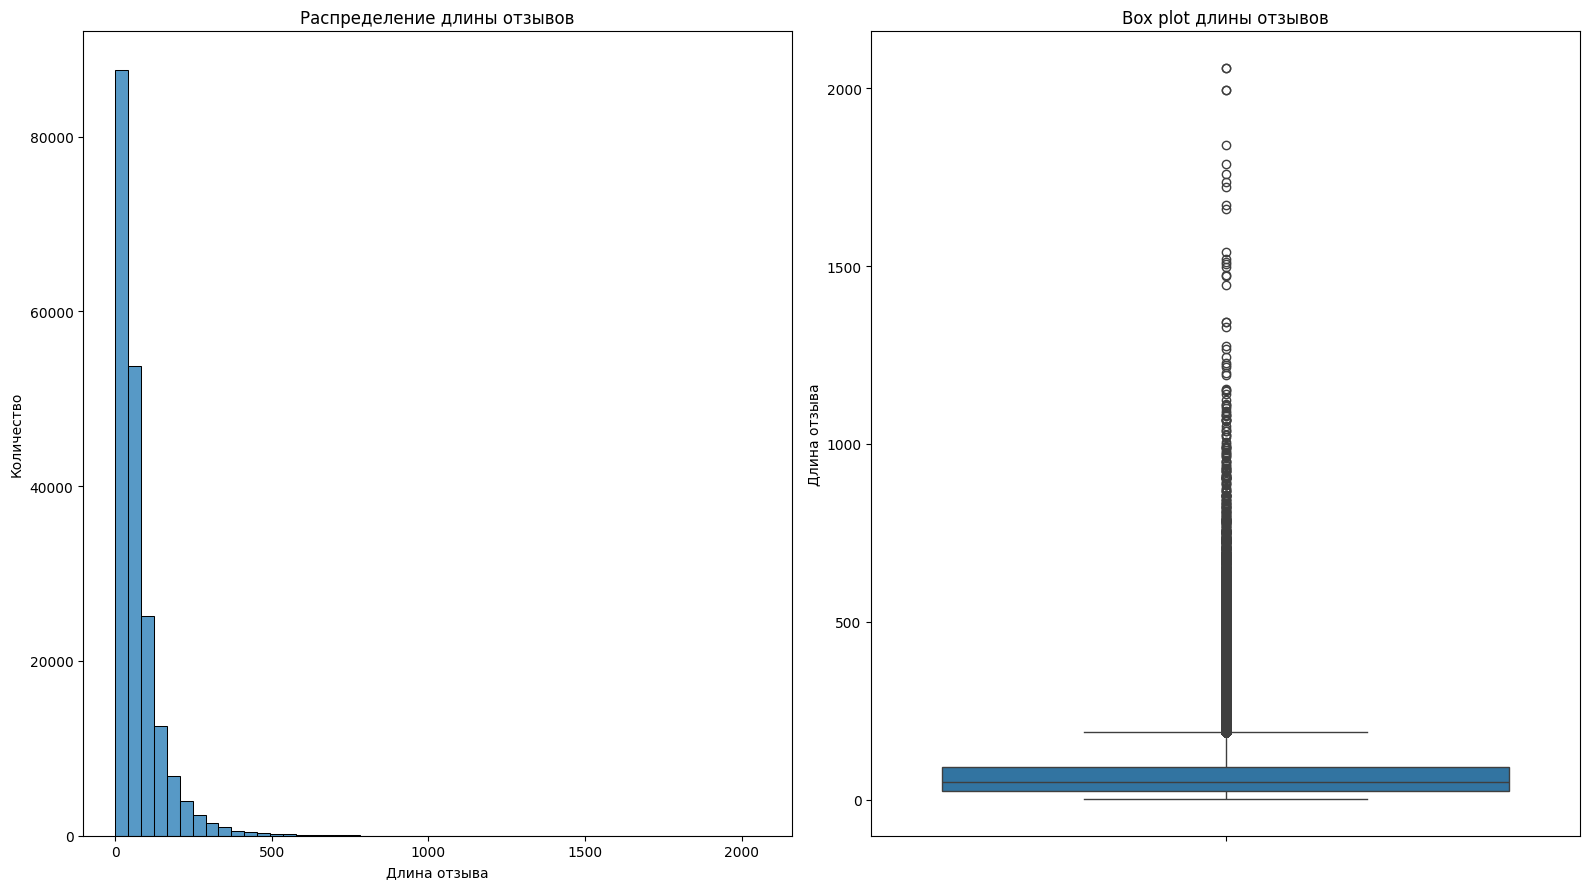


Корреляция между длиной отзыва и оценкой: -0.122


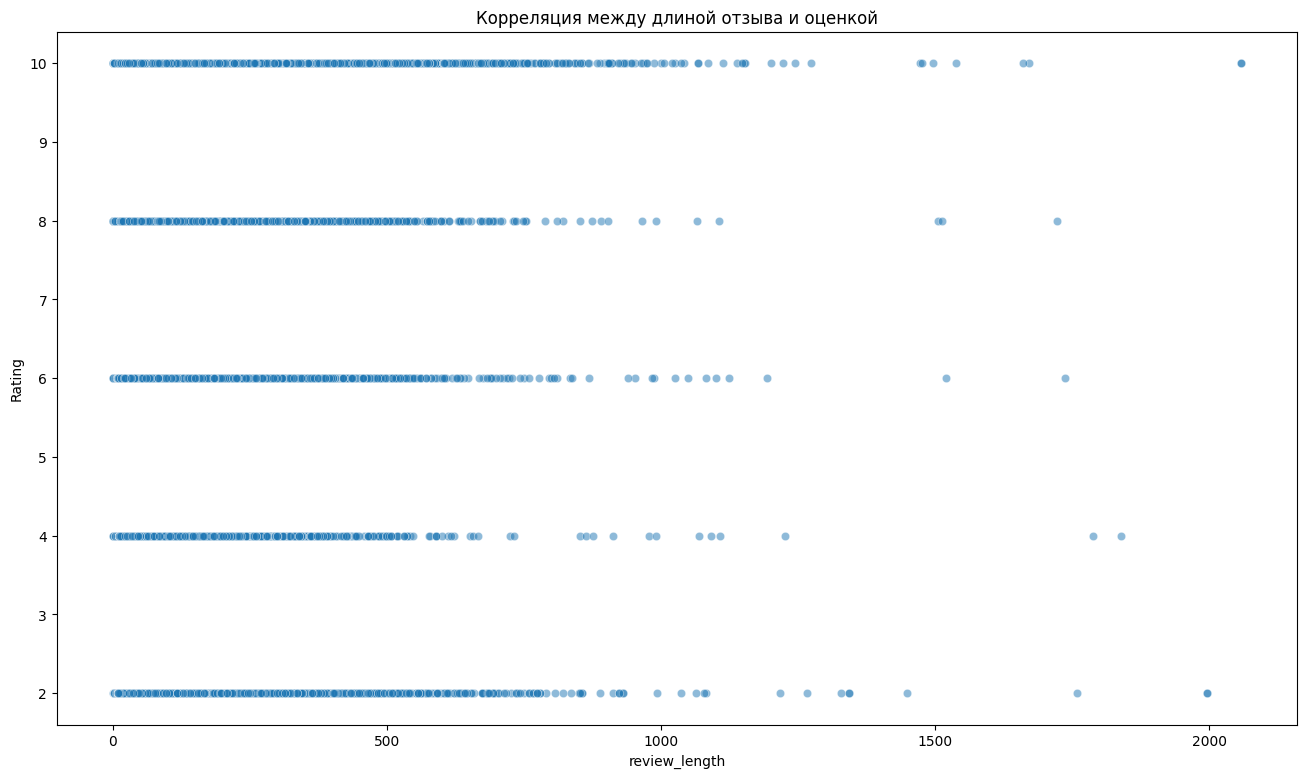


Анализ выбросов:
Количество выбросов: 13184
Процент выбросов: 6.69%

Средняя оценка для обычных отзывов: 9.06
Средняя оценка для очень длинных отзывов: 8.20


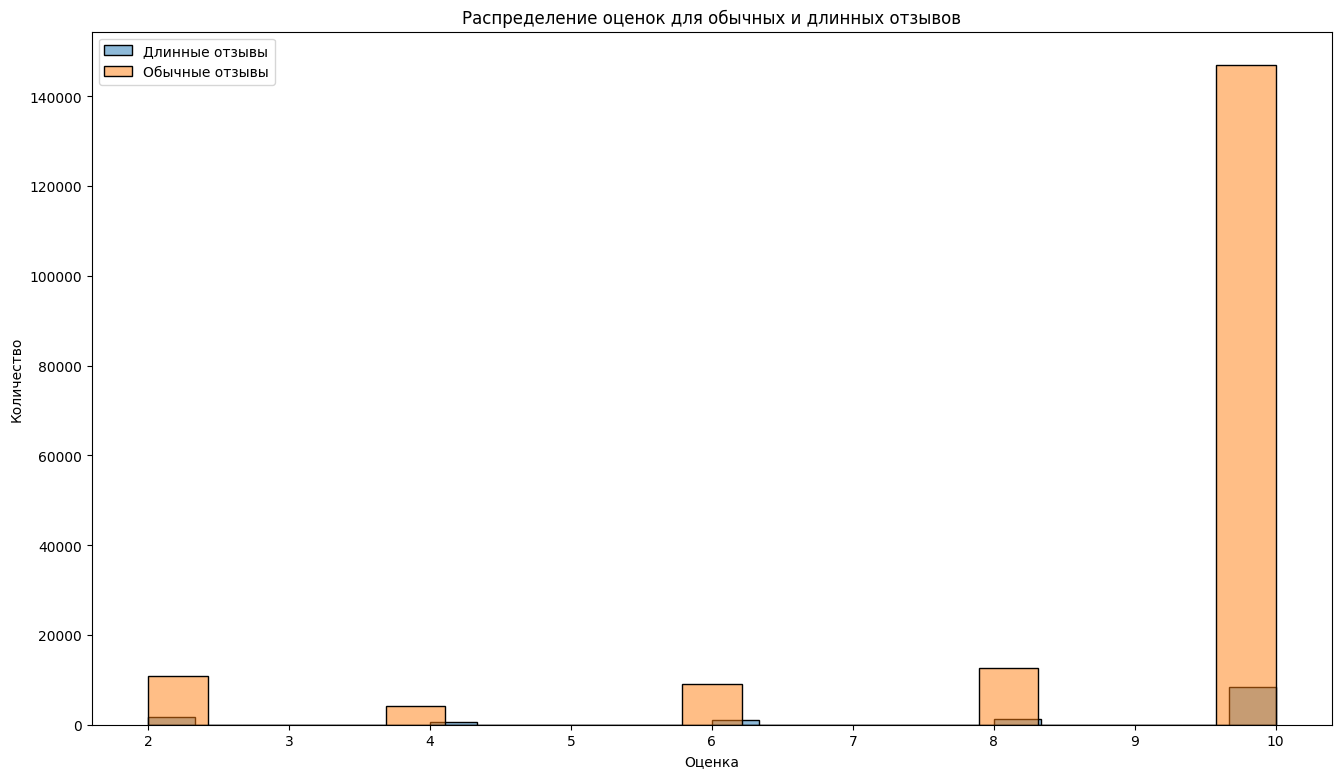


Топ-10 самых частых смайликов:
👍: 9213


<ipython-input-54-6e3914890b6a>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.



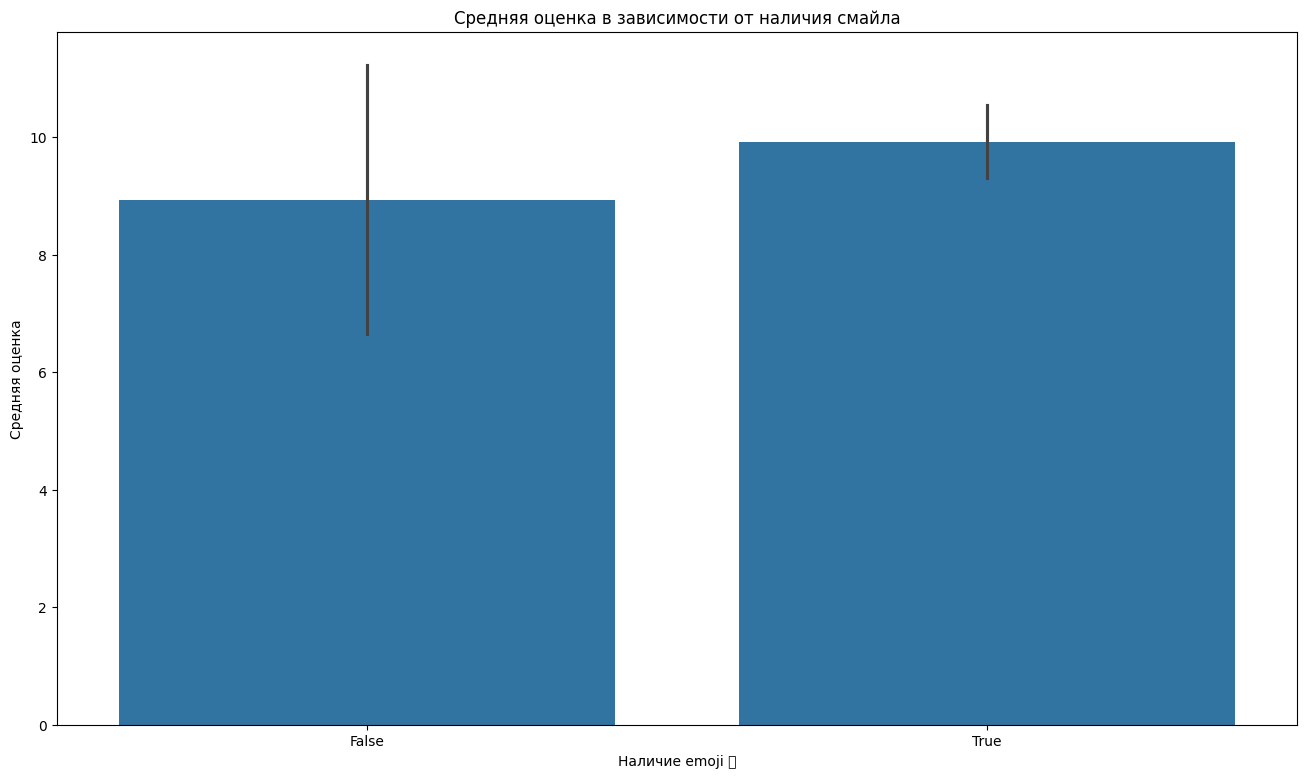

🔥: 1738


<ipython-input-54-6e3914890b6a>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



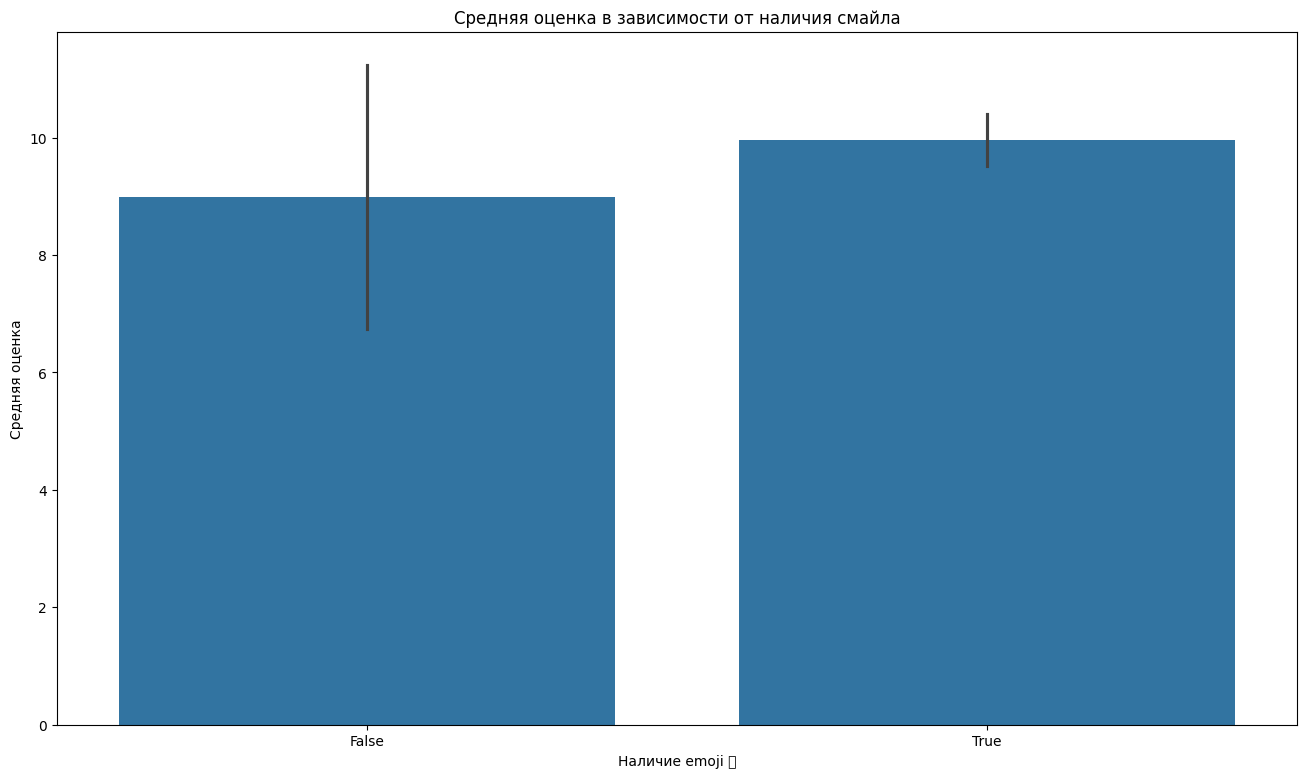

👍👍👍: 1016


<ipython-input-54-6e3914890b6a>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.



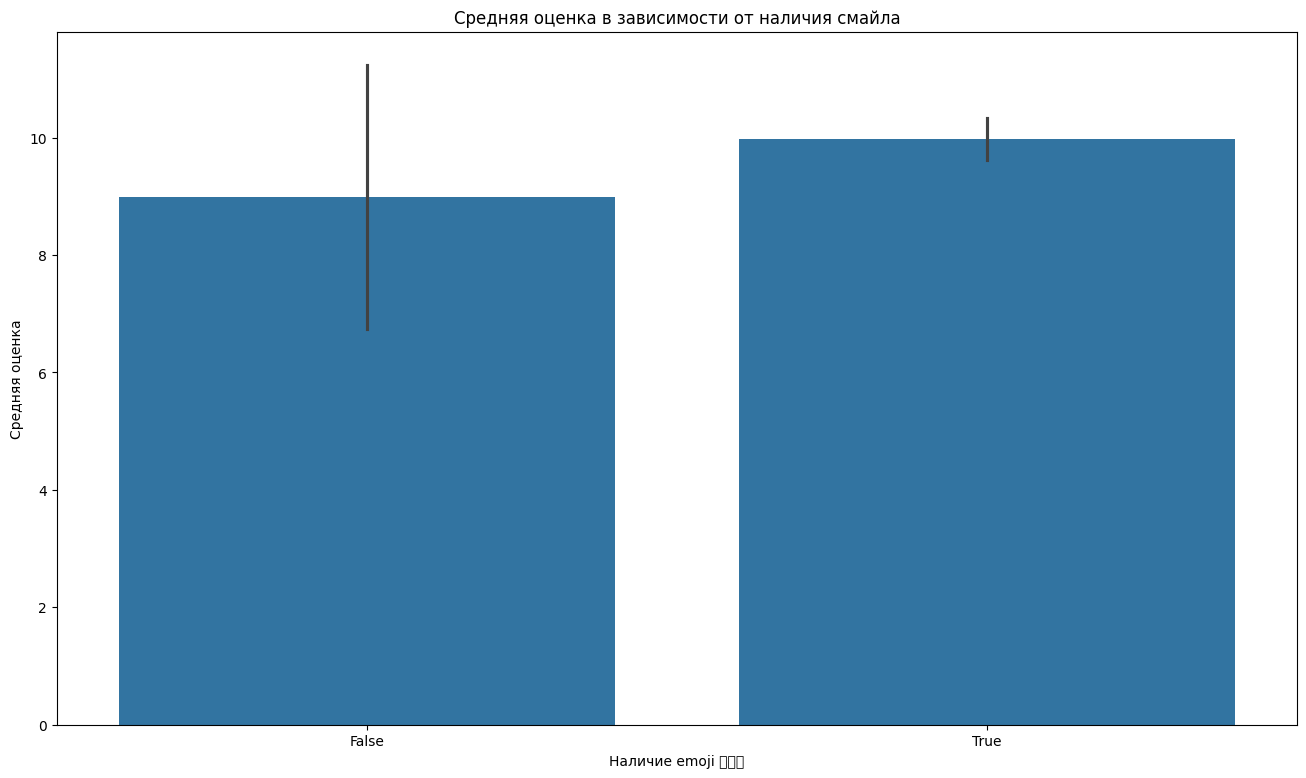

👌: 903


<ipython-input-54-6e3914890b6a>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128076 (\N{OK HAND SIGN}) missing from font(s) DejaVu Sans.



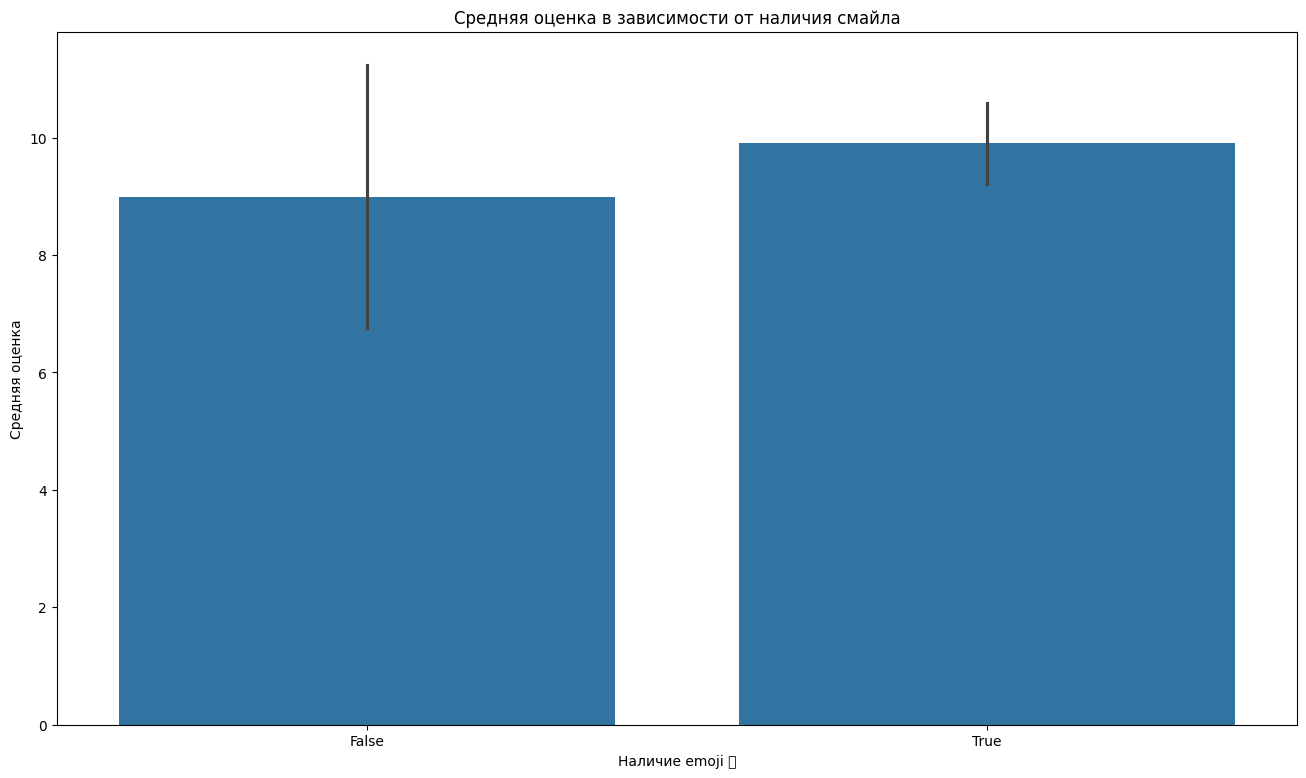

😍: 849


<ipython-input-54-6e3914890b6a>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




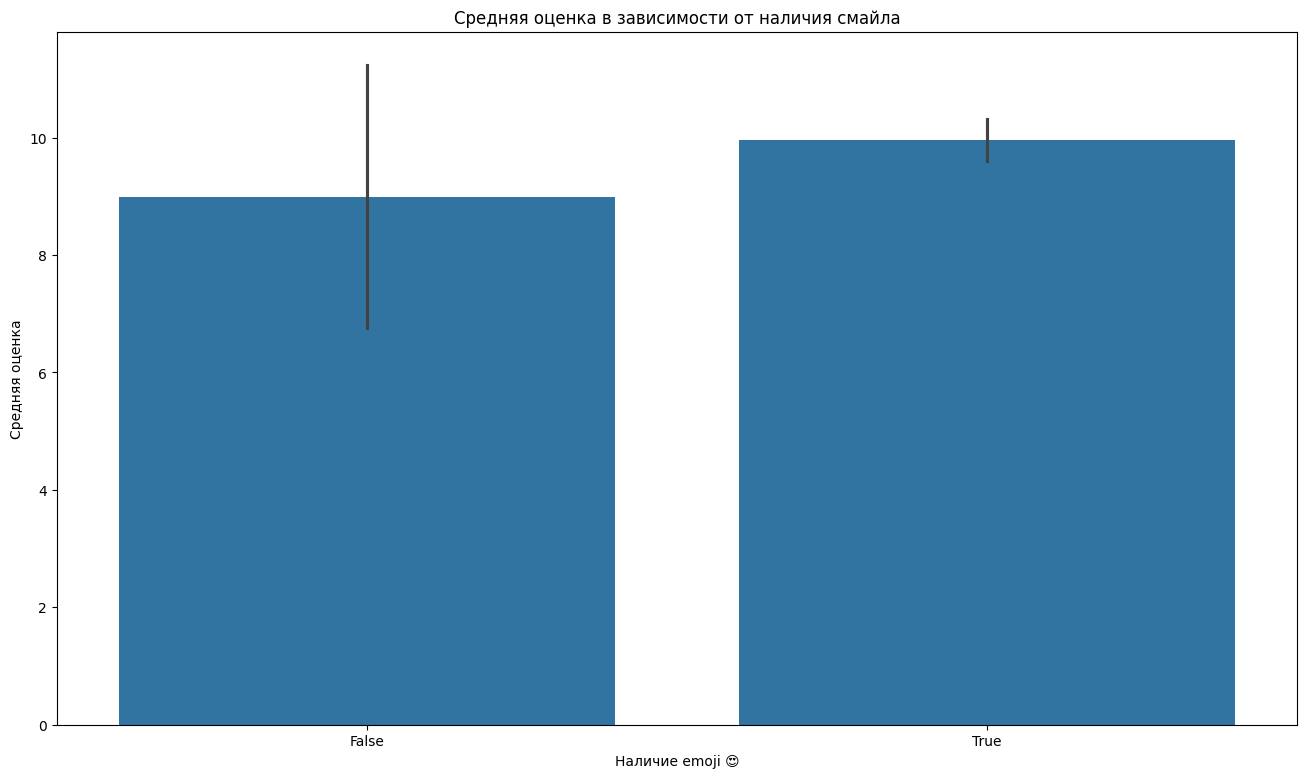

❤️: 847


<ipython-input-54-6e3914890b6a>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




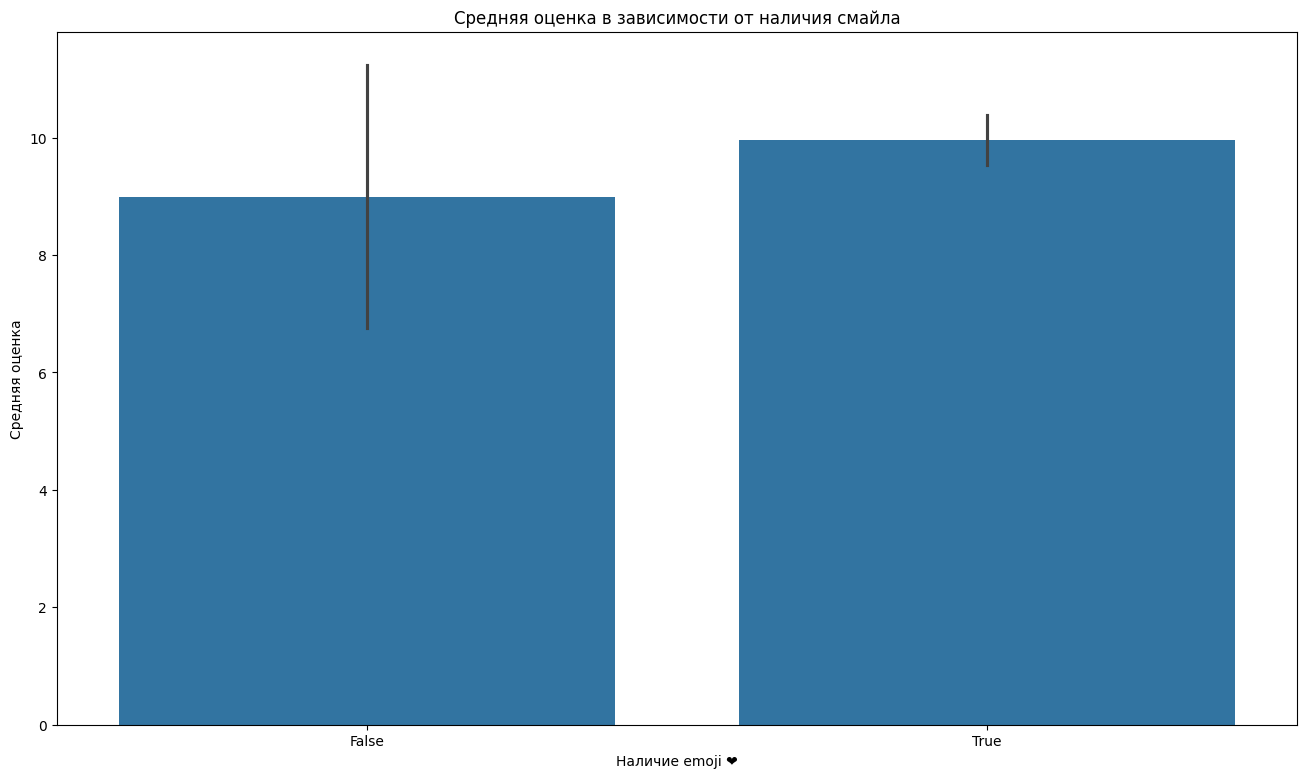

👍🏻: 808


<ipython-input-54-6e3914890b6a>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.



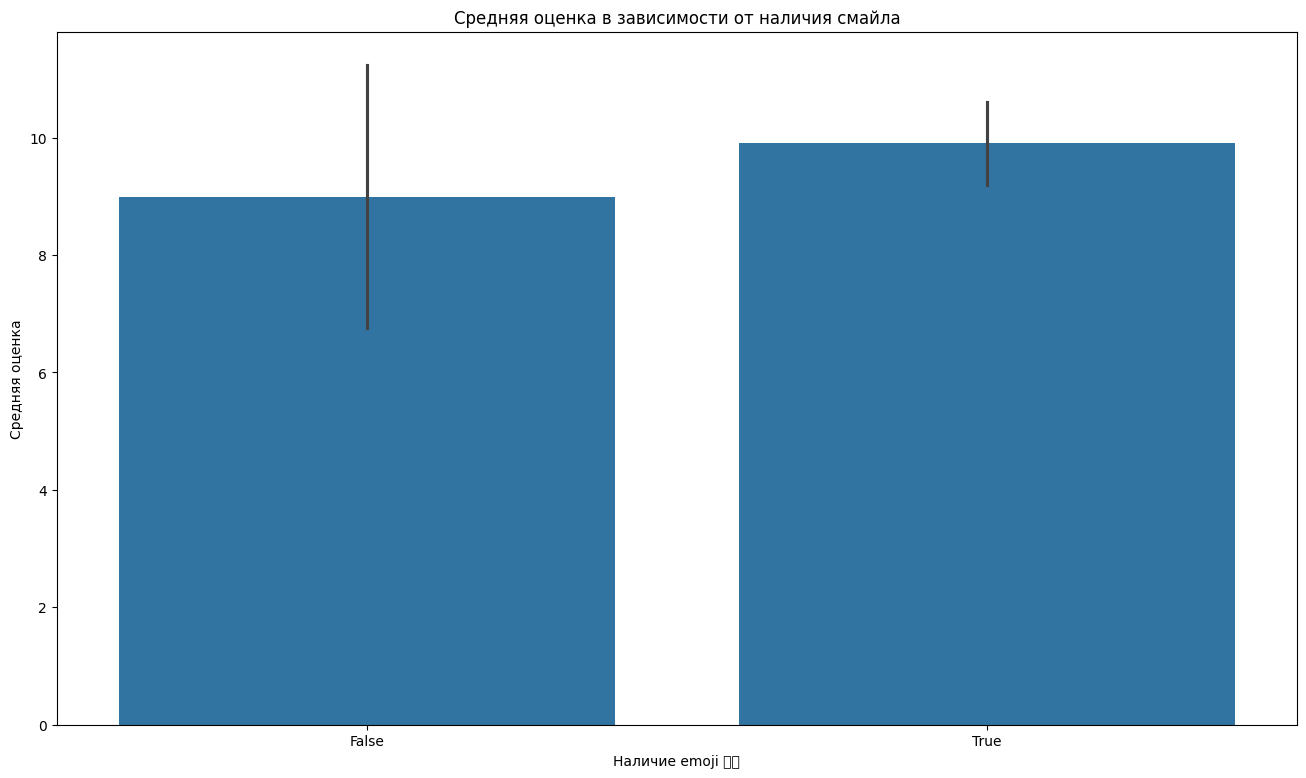

😊: 435


<ipython-input-54-6e3914890b6a>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




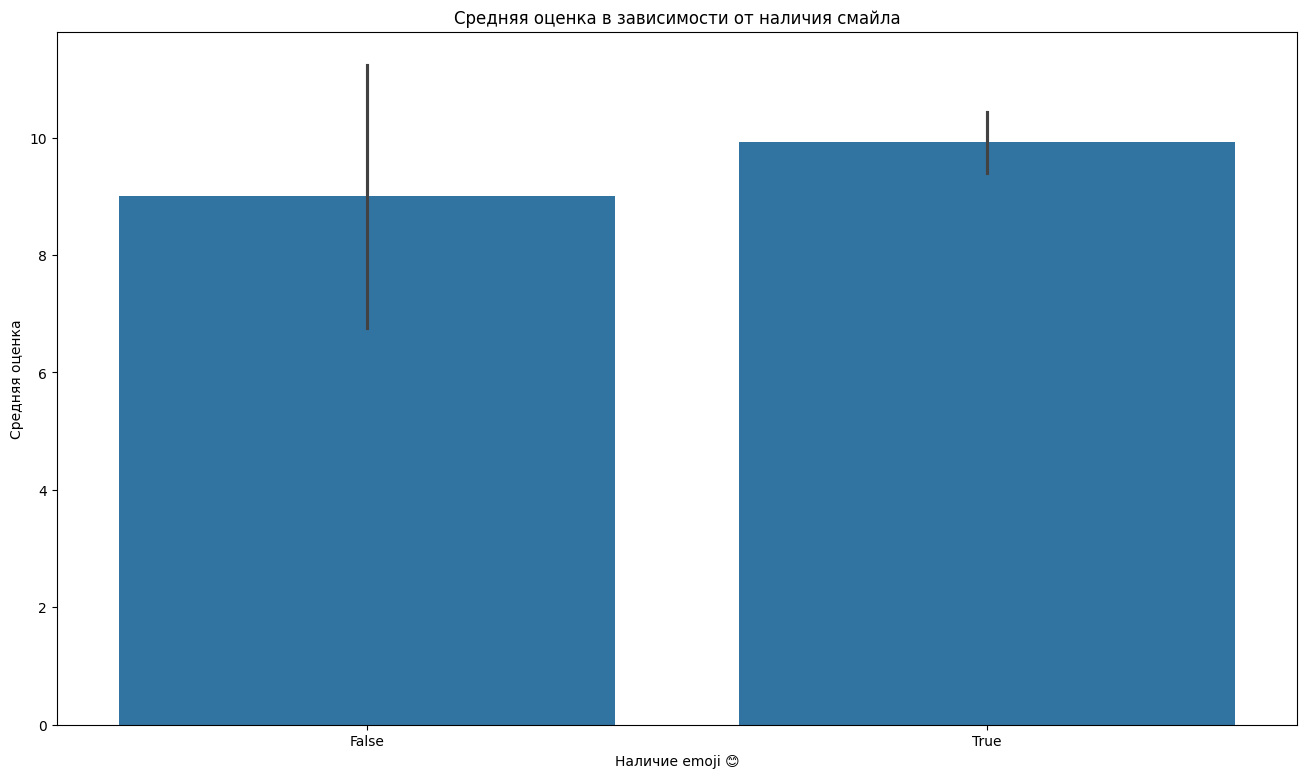

😁: 410


<ipython-input-54-6e3914890b6a>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




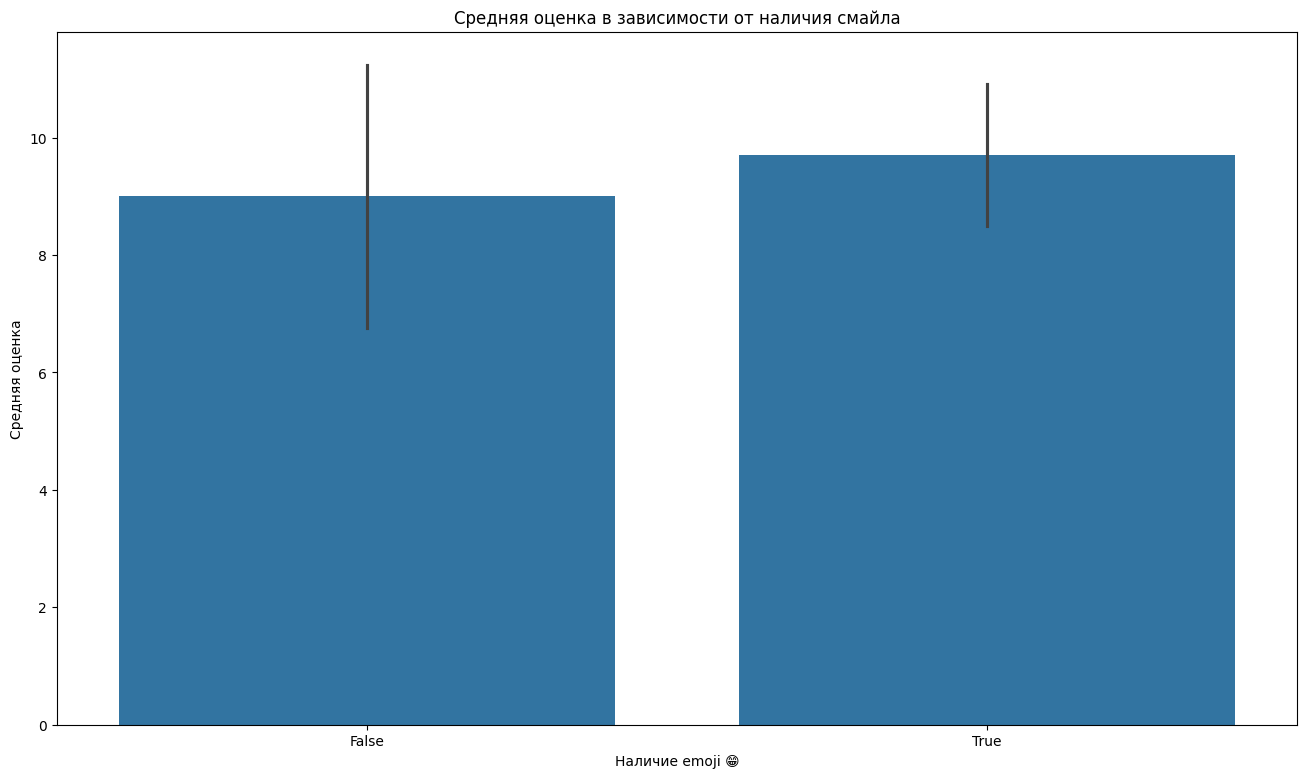

🔥🔥🔥: 341


<ipython-input-54-6e3914890b6a>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



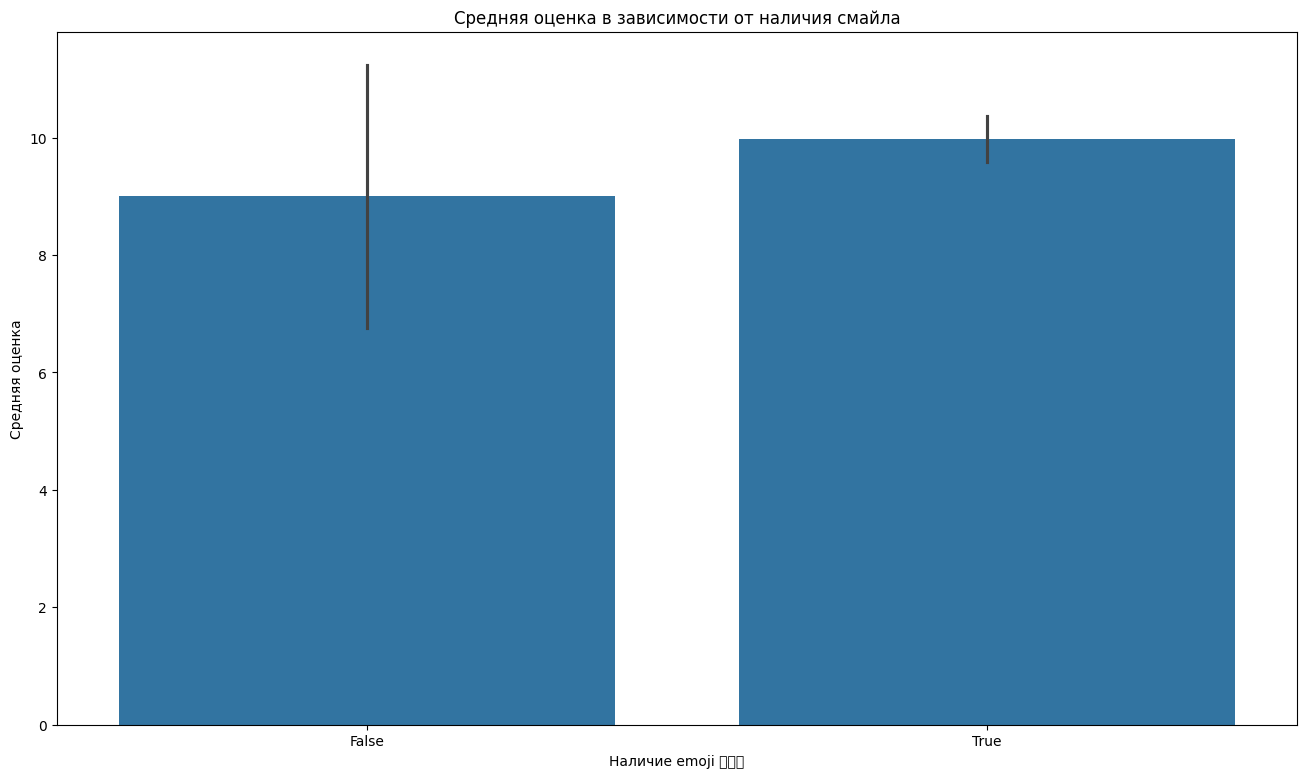


Корреляция между количеством смайликов и оценкой: 0.094


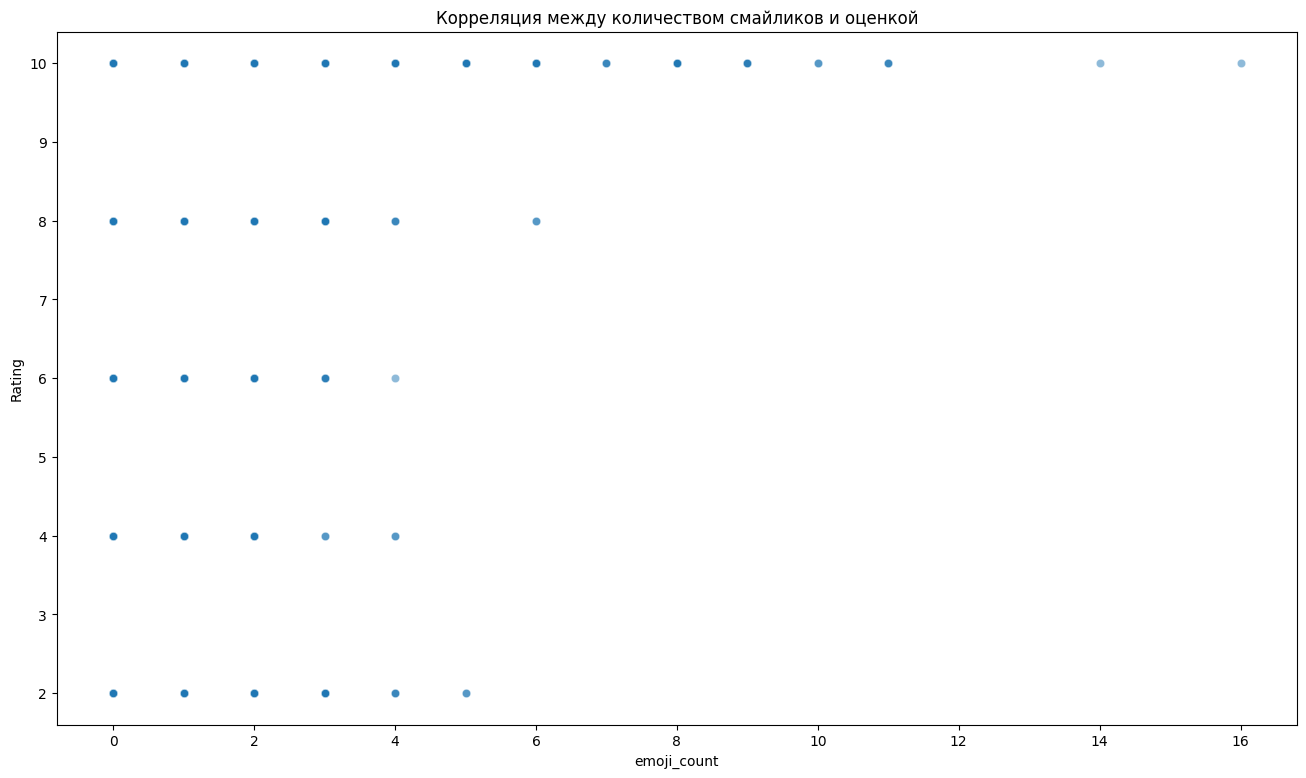

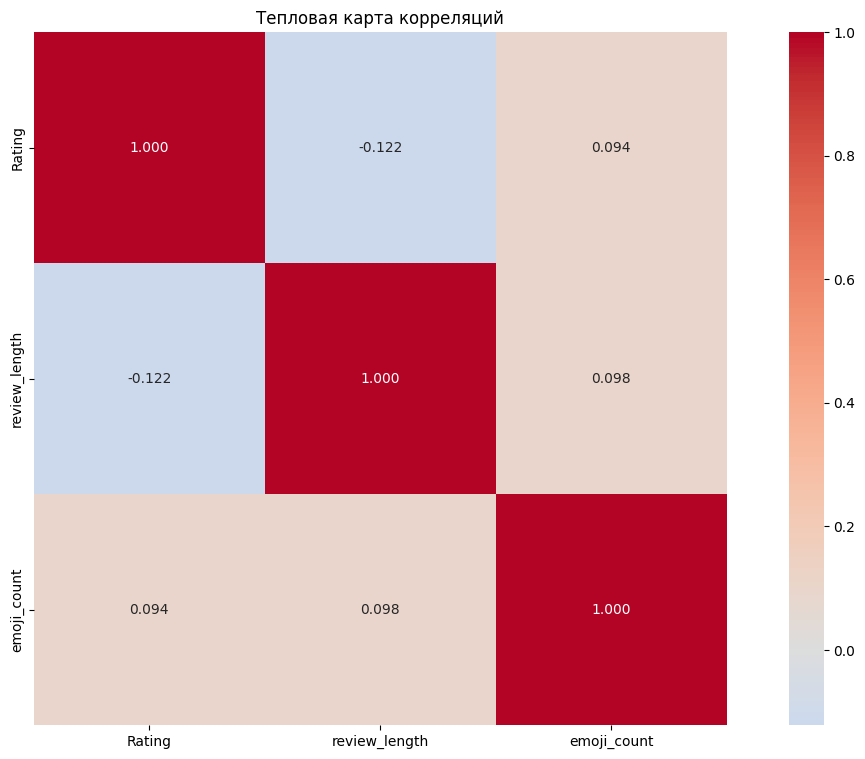

In [54]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='review_length', bins=50)
plt.title('Распределение длины отзывов')
plt.xlabel('Длина отзыва')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['review_length'])
plt.title('Box plot длины отзывов')
plt.ylabel('Длина отзыва')

plt.tight_layout()
plt.show()

Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

outliers_mask = df['review_length'] > outlier_threshold

correlation = df['review_length'].corr(df['Rating'])
print(f"\nКорреляция между длиной отзыва и оценкой: {correlation:.3f}")

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='review_length', y='Rating', alpha=0.5)
plt.title('Корреляция между длиной отзыва и оценкой')
plt.show()

print("\nАнализ выбросов:")
print(f"Количество выбросов: {outliers_mask.sum()}")
print(f"Процент выбросов: {(outliers_mask.sum() / len(df)) * 100:.2f}%")

print(f"\nСредняя оценка для обычных отзывов: {df[~outliers_mask]['Rating'].mean():.2f}")
print(f"Средняя оценка для очень длинных отзывов: {df[outliers_mask]['Rating'].mean():.2f}")

plt.figure(figsize=(16, 9))
sns.histplot(data=df[outliers_mask], x='Rating', label='Длинные отзывы', alpha=0.5)
sns.histplot(data=df[~outliers_mask], x='Rating', label='Обычные отзывы', alpha=0.5)
plt.title('Распределение оценок для обычных и длинных отзывов')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend()
plt.show()

from collections import Counter
import re

def extract_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.findall(text)

all_emojis = []
for review in df['Review']:
    if isinstance(review, str):
        all_emojis.extend(extract_emojis(review))

emoji_counts = Counter(all_emojis)

print("\nТоп-10 самых частых смайликов:")
for emoji, count in emoji_counts.most_common(10):
    print(f"{emoji}: {count}")
    edf = df
    edf["has_emoji"] = edf["Review"].apply(lambda x: x != None and emoji in str(x))
    fig = plt.figure(figsize=(16, 9))
    sns.barplot(x='has_emoji', y='Rating', data=df, ci="sd")
    plt.xlabel(f"Наличие emoji {emoji}")
    plt.ylabel("Средняя оценка")
    plt.title("Средняя оценка в зависимости от наличия смайла")
    plt.show()

df['emoji_count'] = df['Review'].apply(lambda x: len(extract_emojis(str(x))) if isinstance(x, str) else 0)

emoji_correlation = df['emoji_count'].corr(df['Rating'])
print(f"\nКорреляция между количеством смайликов и оценкой: {emoji_correlation:.3f}")

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='emoji_count', y='Rating', alpha=0.5)
plt.title('Корреляция между количеством смайликов и оценкой')
plt.show()

plt.figure(figsize=(16, 9))
sns.heatmap(df[['Rating', 'review_length', 'emoji_count']].corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.3f',
            square=True)
plt.title('Тепловая карта корреляций')
plt.show()





Топ-20 самых частых слов во всем датасете:
         Слово  Частота
0           не    66300
1            и    48253
2            в    43741
3           на    40158
4        очень    36581
5          все    22310
6       хорошо    18754
7           но    17451
8      спасибо    17151
9   рекомендую    15595
10    качество    14680
11         как    14504
12         что    14386
13         нет    14257
14           с    13420
15         всё    12662
16         для    12626
17          за    11882
18     отлично    11238
19     подарок    10956

Топ-20 самых частых биграмм во всем датасете:
               Биграмма  Частота
0         (на, подарок)     4508
1          (в, подарок)     3368
2          (к, покупке)     2953
3   (спасибо, продавцу)     2882
4               (и, не)     2645
5         (первый, раз)     2520
6   (качество, хорошее)     2139
7        (все, отлично)     2112
8         (в, восторге)     2073
9         (спасибо, за)     1908
10  (очень, понравился)     1877
11        

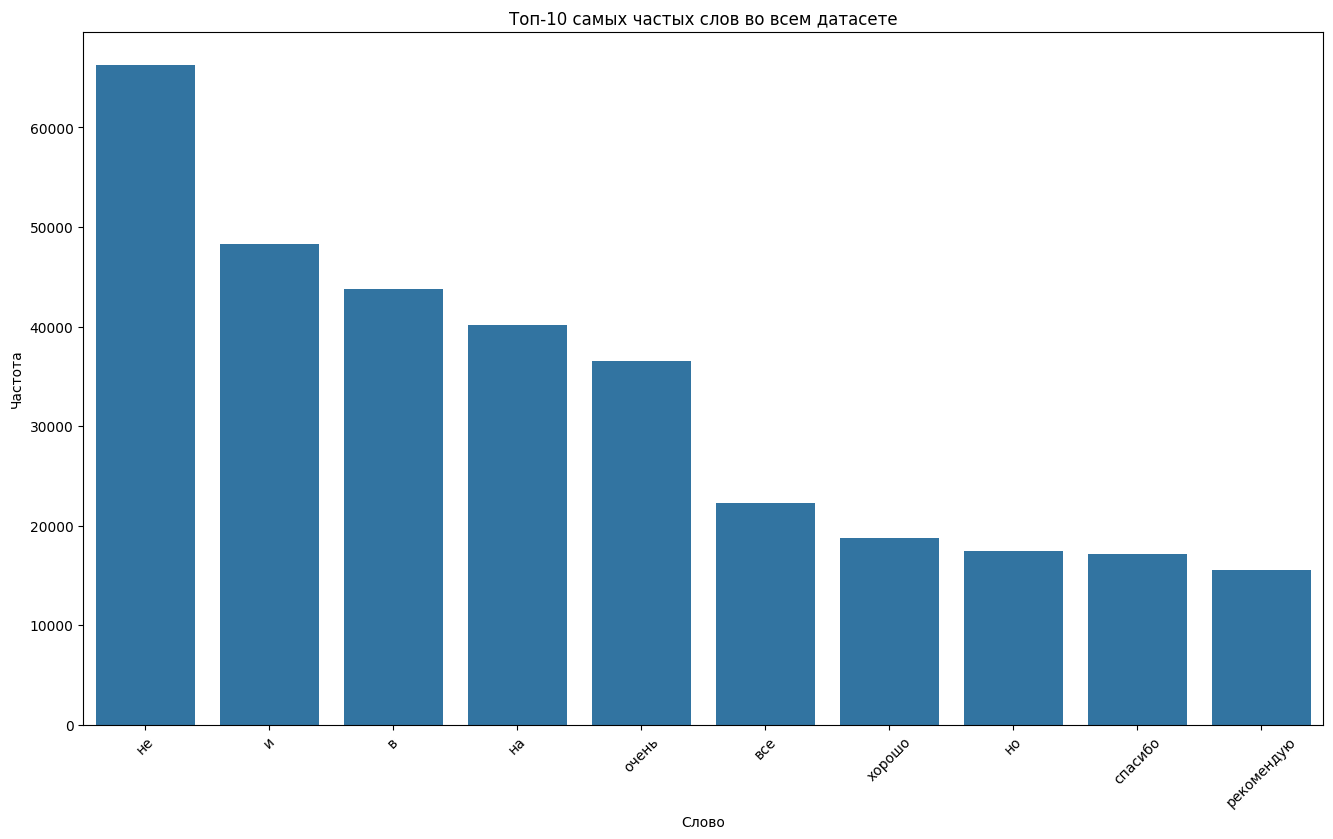

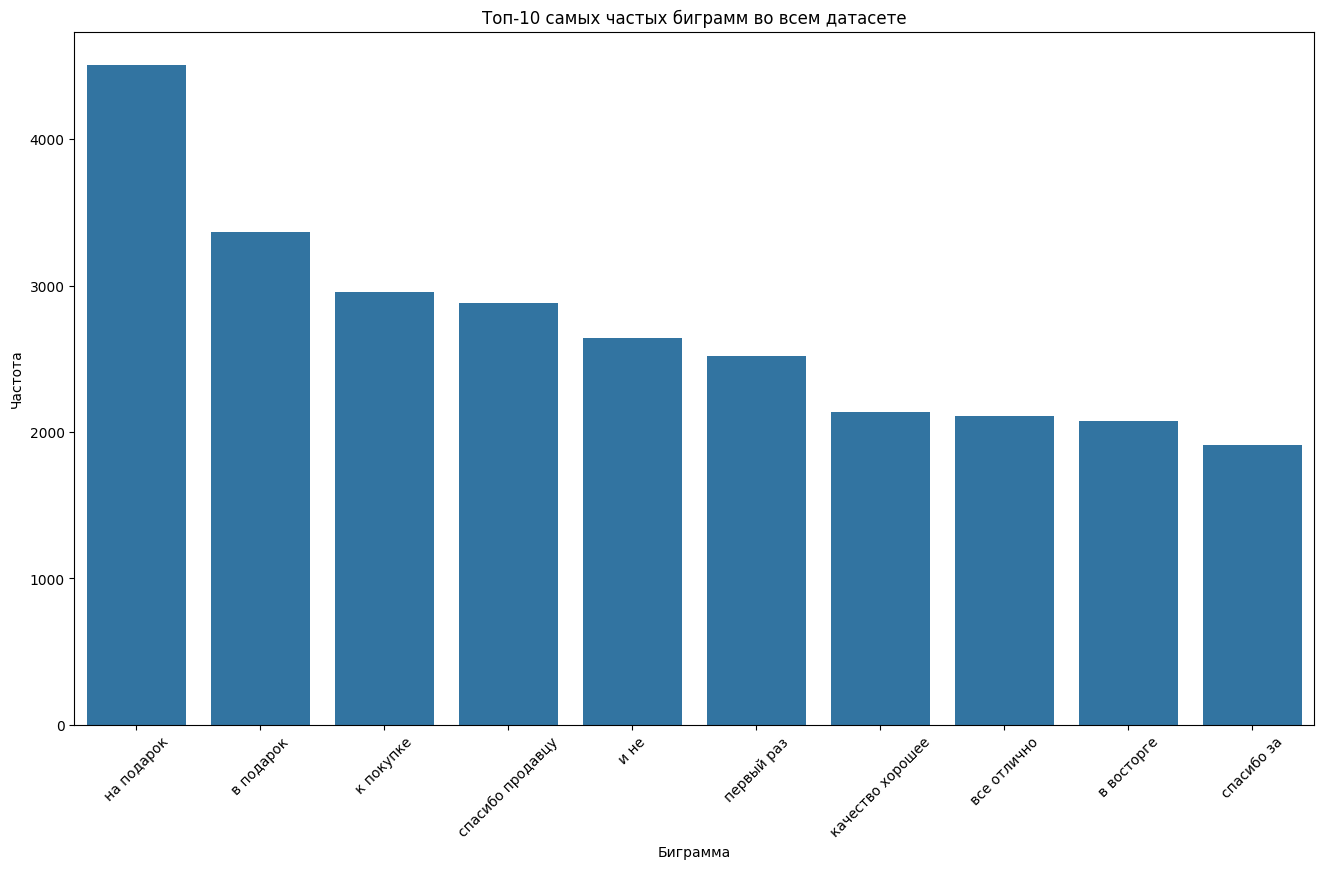

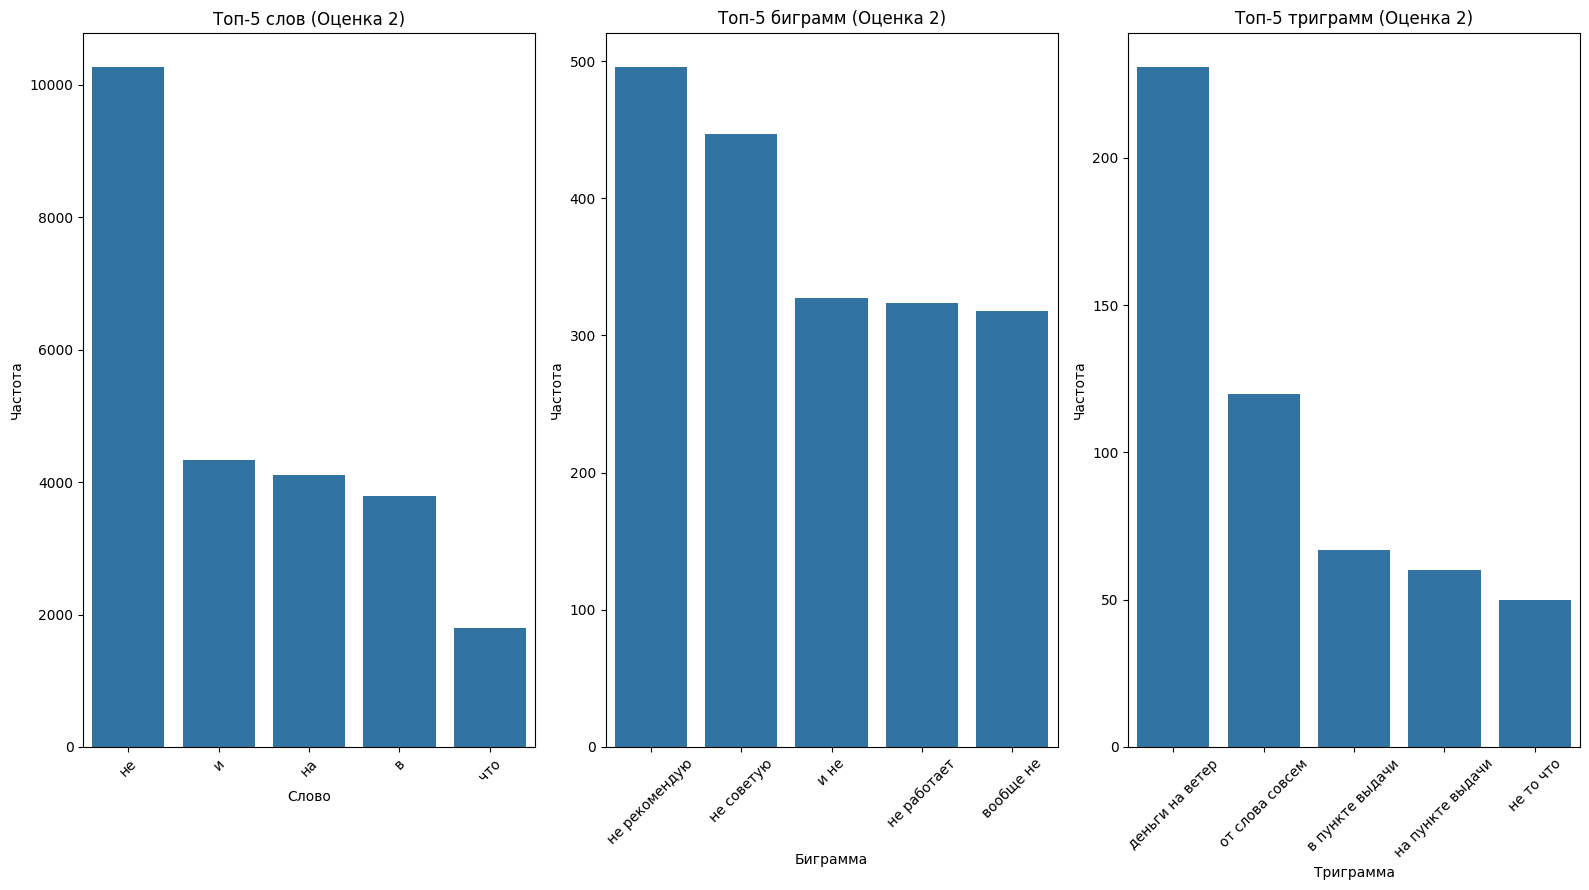

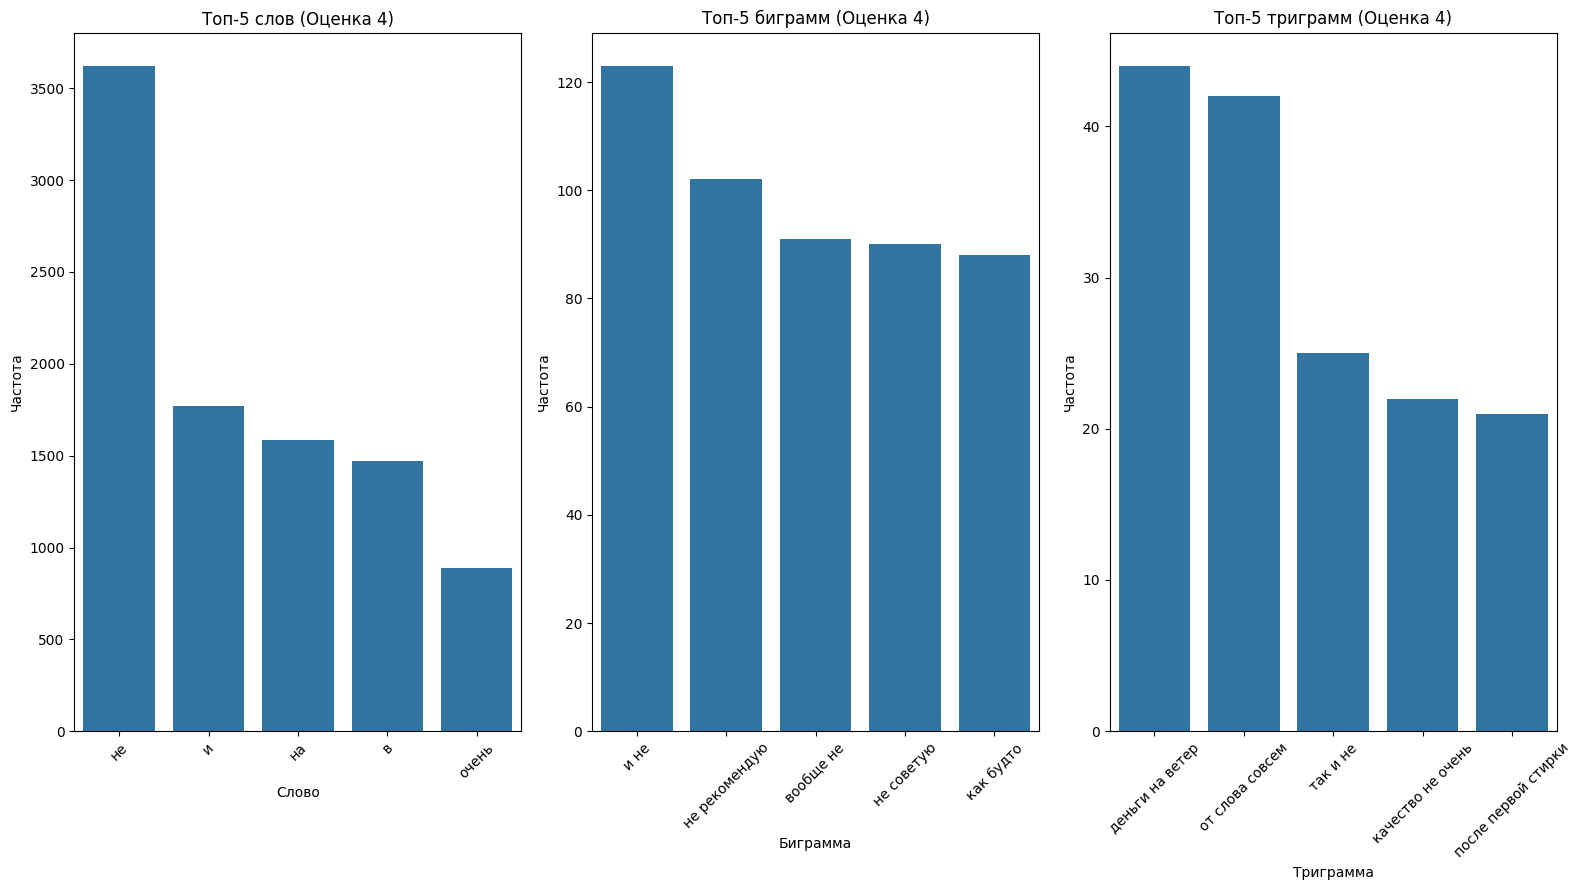

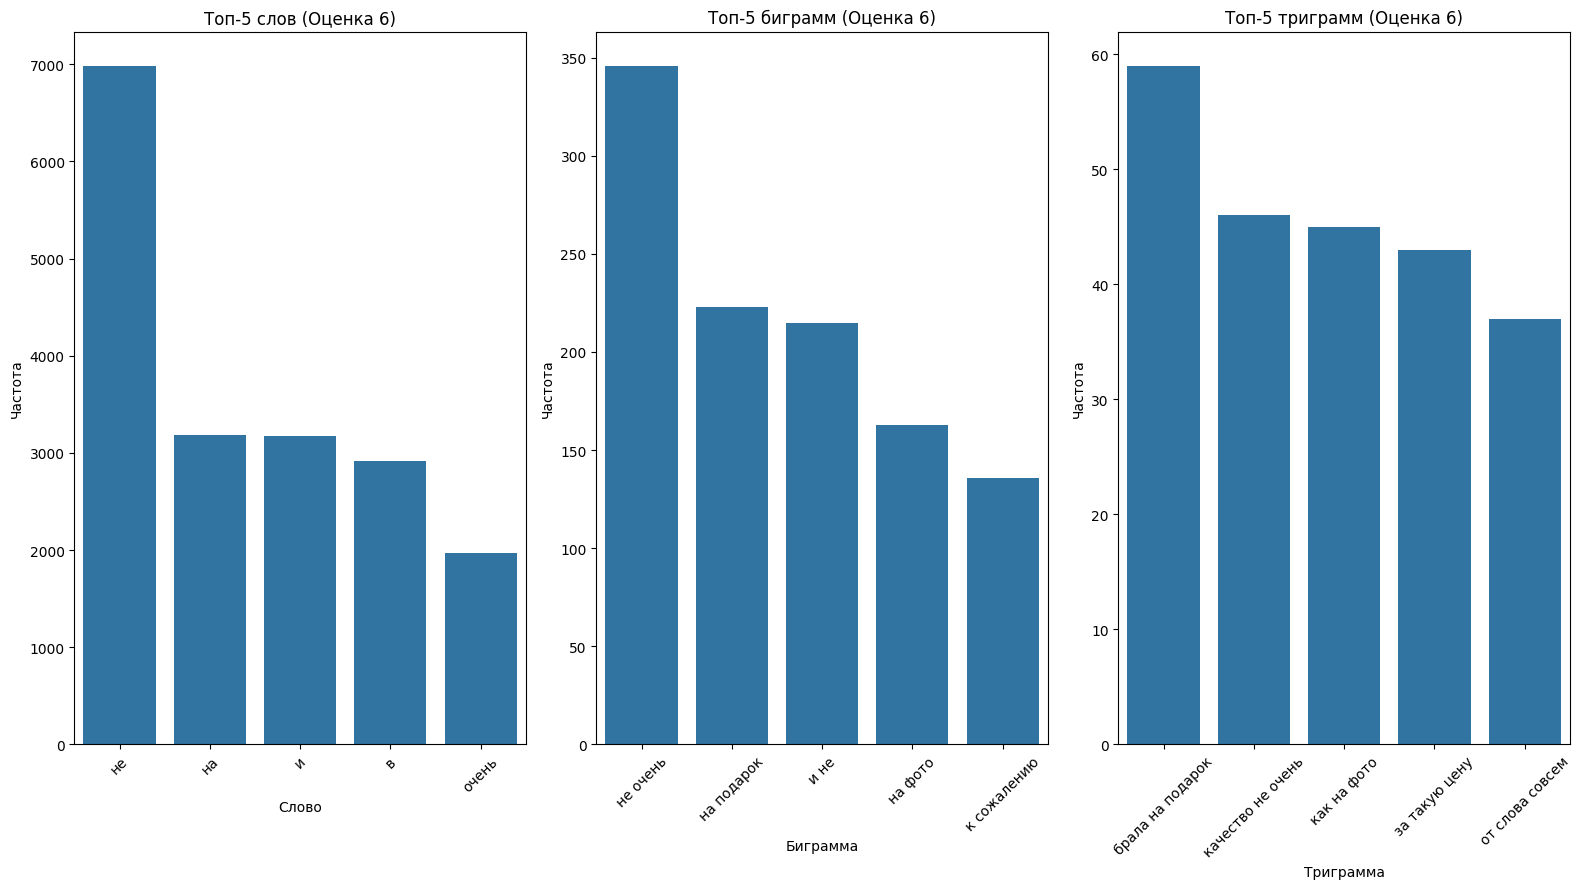

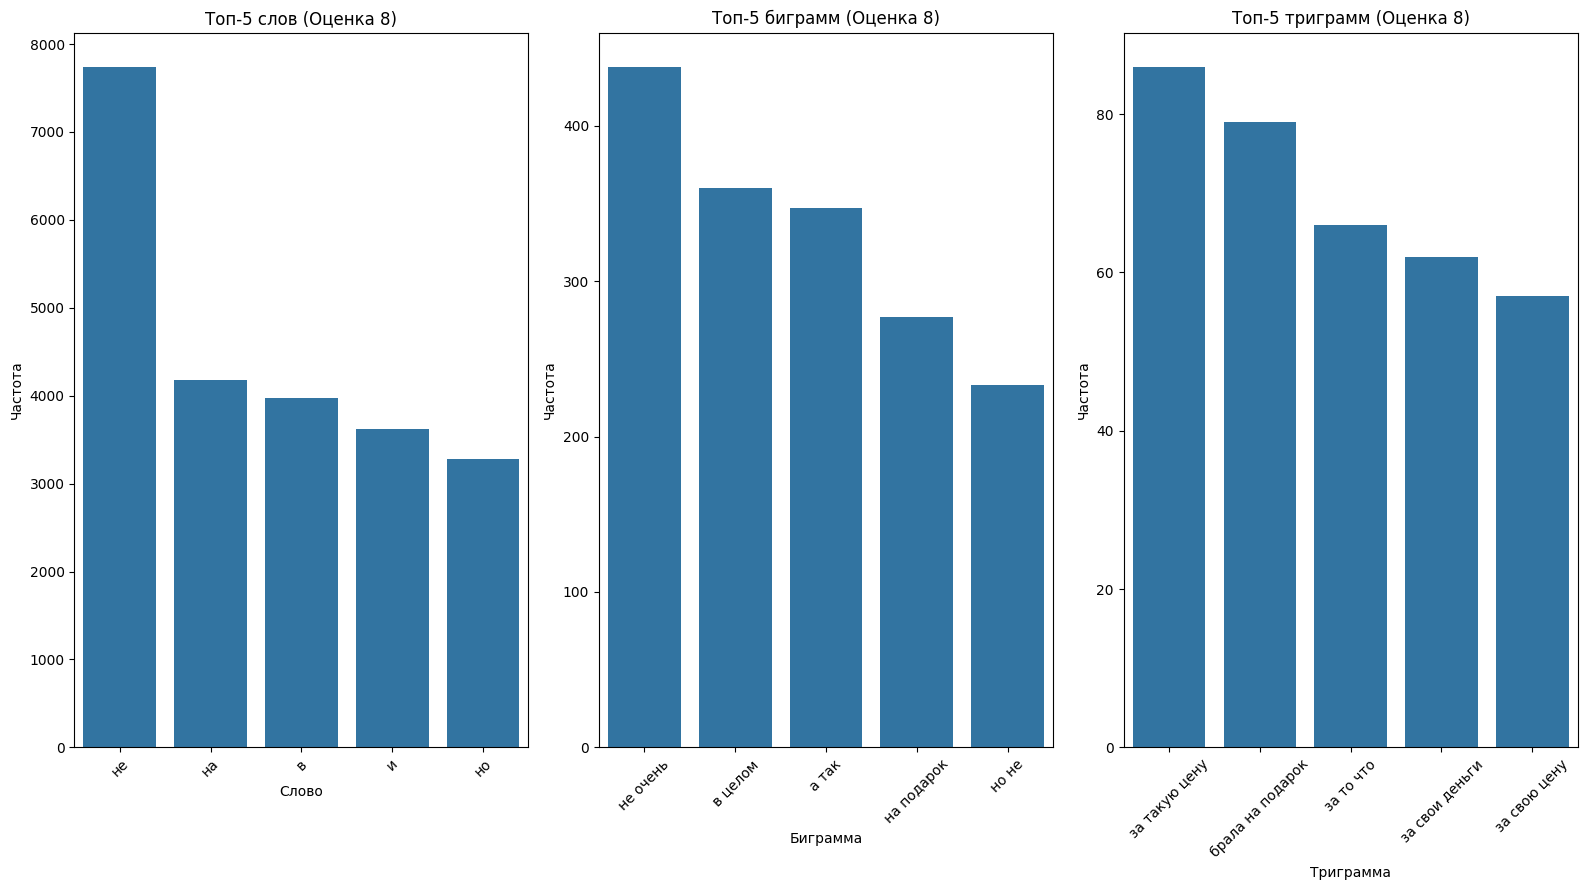

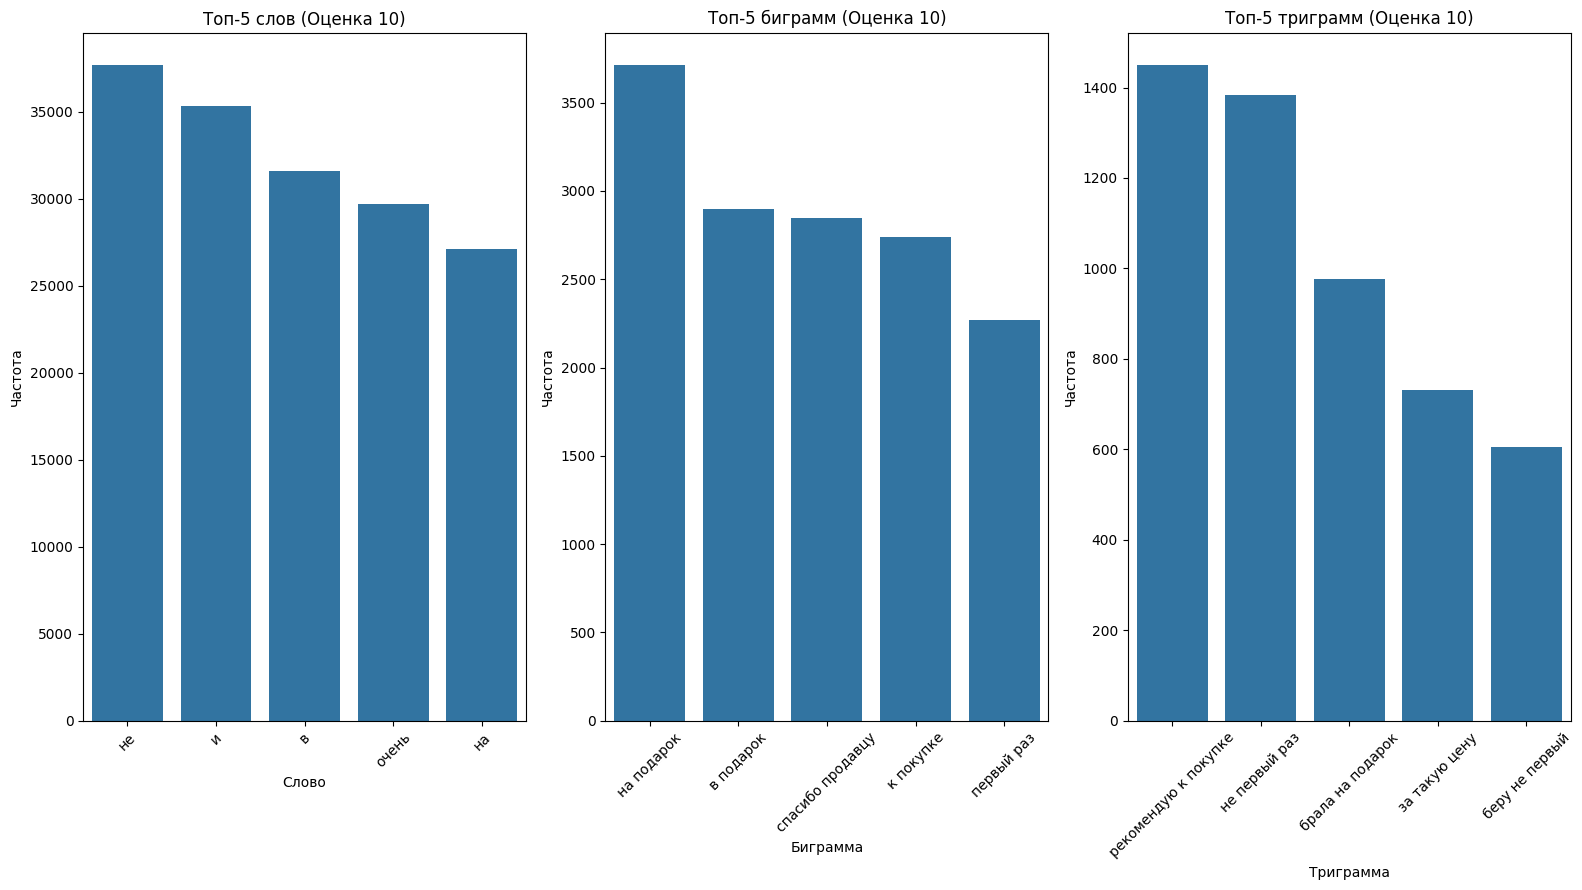

In [55]:
from collections import Counter
from nltk.util import ngrams
import re

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

all_words = []
all_bigrams = []
all_trigrams = []

words_by_rating = {i: [] for i in range(1, 11)}
bigrams_by_rating = {i: [] for i in range(1, 11)}
trigrams_by_rating = {i: [] for i in range(1, 11)}

for review, rating in zip(df['Review'], df['Rating']):
    text = preprocess_text(review)
    words = text.split()
    if len(words) < 1:
      continue

    all_words.extend(words)
    all_bigrams.extend(list(ngrams(words, 2)))
    all_trigrams.extend(list(ngrams(words, 3)))

    words_by_rating[rating].extend(words)
    bigrams_by_rating[rating].extend(list(ngrams(words, 2)))
    trigrams_by_rating[rating].extend(list(ngrams(words, 3)))

print("Топ-20 самых частых слов во всем датасете:")
print(pd.DataFrame(Counter(all_words).most_common(20), columns=['Слово', 'Частота']))

print("\nТоп-20 самых частых биграмм во всем датасете:")
print(pd.DataFrame(Counter(all_bigrams).most_common(20), columns=['Биграмма', 'Частота']))

print("\nТоп-20 самых частых триграмм во всем датасете:")
print(pd.DataFrame(Counter(all_trigrams).most_common(20), columns=['Триграмма', 'Частота']))

for rating in range(1, 11):
    print(f"\n\nАнализ для оценки {rating}:")

    print(f"\nТоп-10 самых частых слов для оценки {rating}:")
    print(pd.DataFrame(Counter(words_by_rating[rating]).most_common(10),
                      columns=['Слово', 'Частота']))

    print(f"\nТоп-10 самых частых биграмм для оценки {rating}:")
    print(pd.DataFrame(Counter(bigrams_by_rating[rating]).most_common(10),
                      columns=['Биграмма', 'Частота']))

    print(f"\nТоп-10 самых частых триграмм для оценки {rating}:")
    print(pd.DataFrame(Counter(trigrams_by_rating[rating]).most_common(10),
                      columns=['Триграмма', 'Частота']))

top_words = pd.DataFrame(Counter(all_words).most_common(10), columns=['Слово', 'Частота'])
plt.figure(figsize=(16, 9))
sns.barplot(data=top_words, x='Слово', y='Частота')
plt.title('Топ-10 самых частых слов во всем датасете')
plt.xticks(rotation=45)
plt.show()

top_bigrams = pd.DataFrame(Counter(all_bigrams).most_common(10), columns=['Биграмма', 'Частота'])
top_bigrams['Биграмма'] = top_bigrams['Биграмма'].apply(lambda x: ' '.join(x))
plt.figure(figsize=(16, 9))
sns.barplot(data=top_bigrams, x='Биграмма', y='Частота')
plt.title('Топ-10 самых частых биграмм во всем датасете')
plt.xticks(rotation=45)
plt.show()

for rating in range(1, 11):
    if words_by_rating[rating]:
        plt.figure(figsize=(16, 9))

        plt.subplot(131)
        top_words = pd.DataFrame(Counter(words_by_rating[rating]).most_common(5),
                               columns=['Слово', 'Частота'])
        sns.barplot(data=top_words, x='Слово', y='Частота')
        plt.title(f'Топ-5 слов (Оценка {rating})')
        plt.xticks(rotation=45)

        plt.subplot(132)
        top_bigrams = pd.DataFrame(Counter(bigrams_by_rating[rating]).most_common(5),
                                 columns=['Биграмма', 'Частота'])
        top_bigrams['Биграмма'] = top_bigrams['Биграмма'].apply(lambda x: ' '.join(x))
        sns.barplot(data=top_bigrams, x='Биграмма', y='Частота')
        plt.title(f'Топ-5 биграмм (Оценка {rating})')
        plt.xticks(rotation=45)

        plt.subplot(133)
        top_trigrams = pd.DataFrame(Counter(trigrams_by_rating[rating]).most_common(5),
                                  columns=['Триграмма', 'Частота'])
        top_trigrams['Триграмма'] = top_trigrams['Триграмма'].apply(lambda x: ' '.join(x))
        sns.barplot(data=top_trigrams, x='Триграмма', y='Частота')
        plt.title(f'Топ-5 триграмм (Оценка {rating})')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

In [56]:
df_reviews_5 = df[df["Rating"] == 10].sample(n=30000, random_state=42)
df_reviews_other = df[df["Rating"] != 10]
old_df = df.copy()
df = pd.concat([df_reviews_5, df_reviews_other])

In [57]:
df.head()

,Good's name,Description,Review,Rating,review_length,has_emoji,emoji_count
32581,Водолазка утепленная с высоким горлом,Мужская водолазка с высоким горлом и с легким ...,Очень красивая водолазка. По размеру подошла ....,10,109.0,False,0
143045,Респиратор от химии и пыли для покраски многор...,Требуется комфортная и надежная защита органов...,После двух использований полёт нормальный! Не...,10,119.0,False,0
46052,"Бальзам кондиционер для окрашенных волос, 400 мл","Натуральный бальзам для волос SYNERGETIC ""Макс...","Нравится, беру уже не первый раз.",10,33.0,False,0
121949,"Колготки 100 den COLOR, цветные",Цветные колготки из мягкой мультифибры на кажд...,Бардо в тренде очень красиво Нету Мякгий иде...,10,83.0,False,0
60262,Опыты для детей 16 в 1 на подарок,Вам надоели обычные игры? Подарите вашим детям...,"Ребёнок в восторге,за один день асе бы зделал,...",10,103.0,False,0


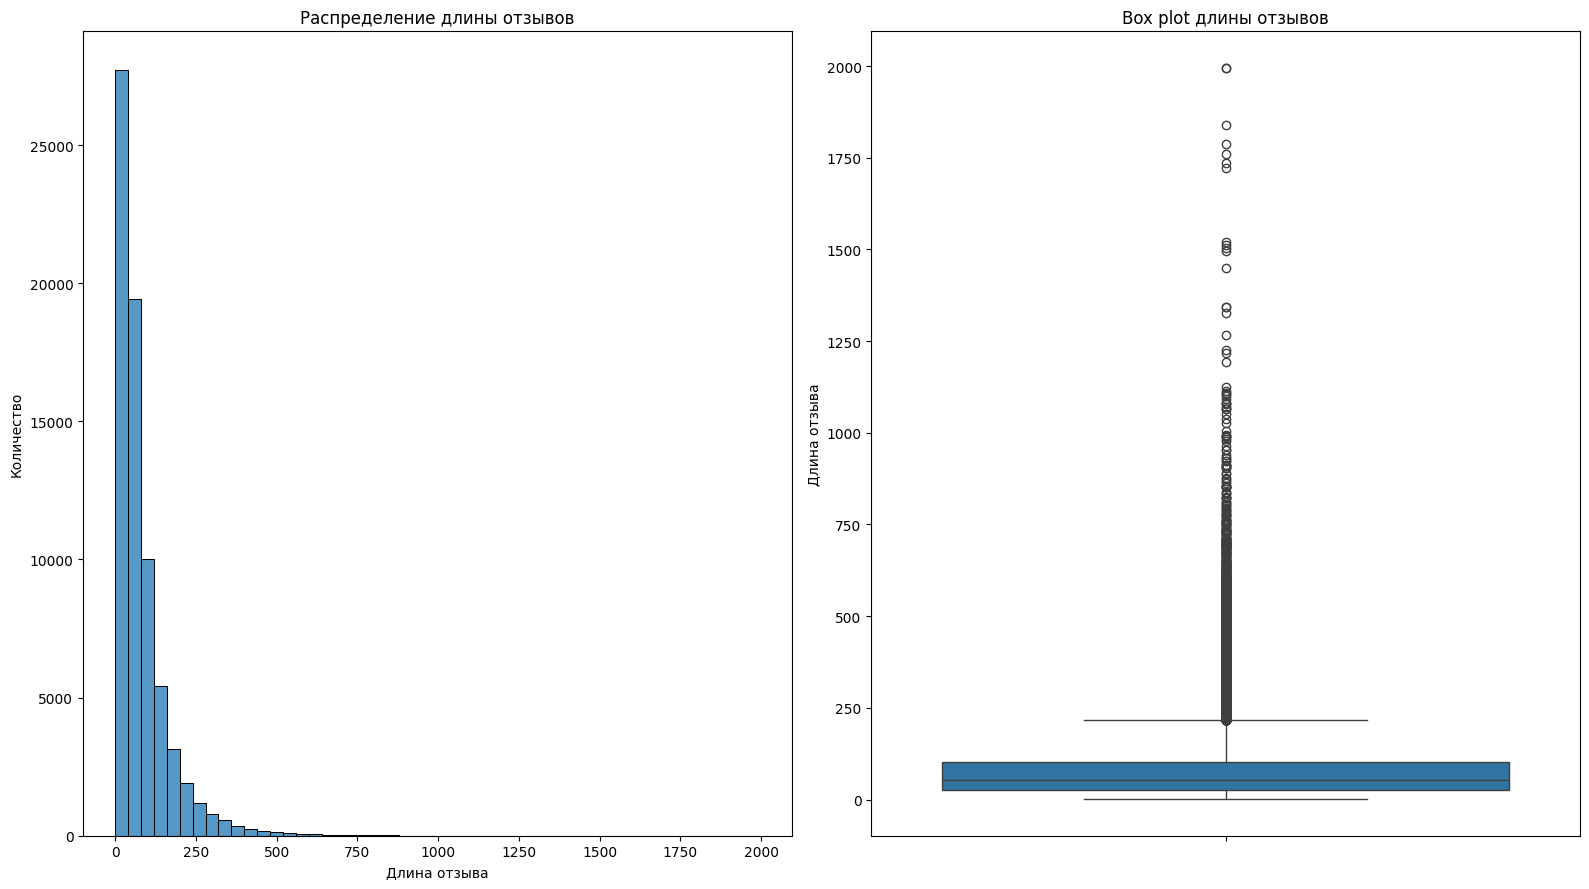


Корреляция между длиной отзыва и оценкой: -0.127


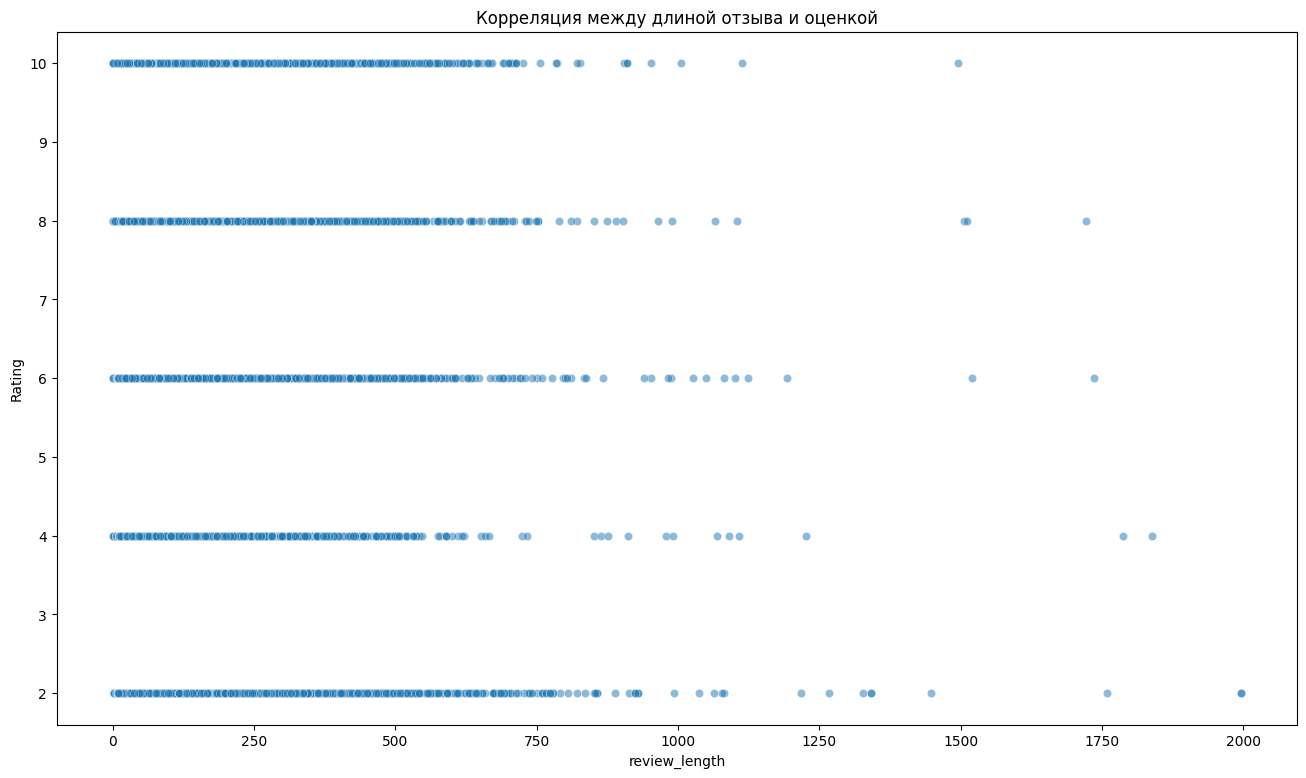


Анализ выбросов:
Количество выбросов: 4758
Процент выбросов: 6.66%

Средняя оценка для обычных отзывов: 7.32
Средняя оценка для очень длинных отзывов: 6.18


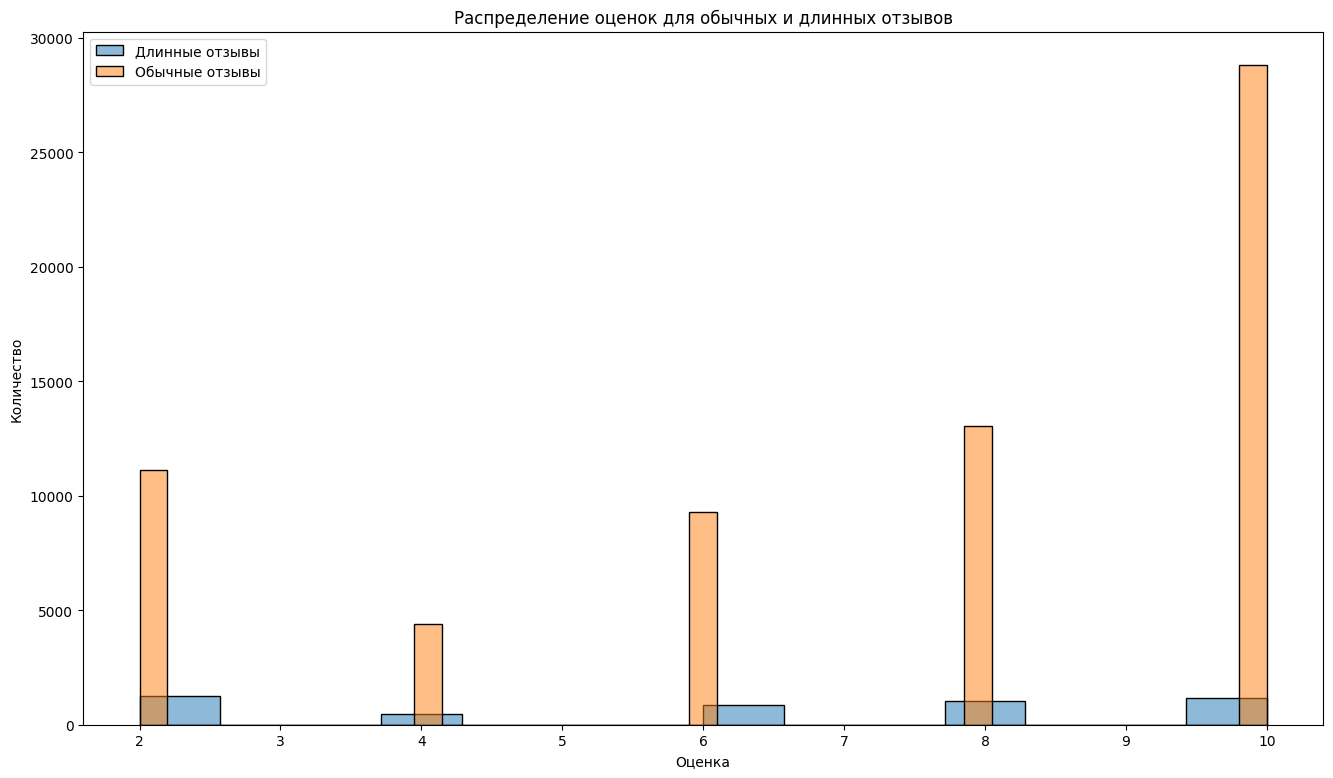


Топ-10 самых частых смайликов:
👍: 1929


<ipython-input-58-46a51eaca8ad>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.



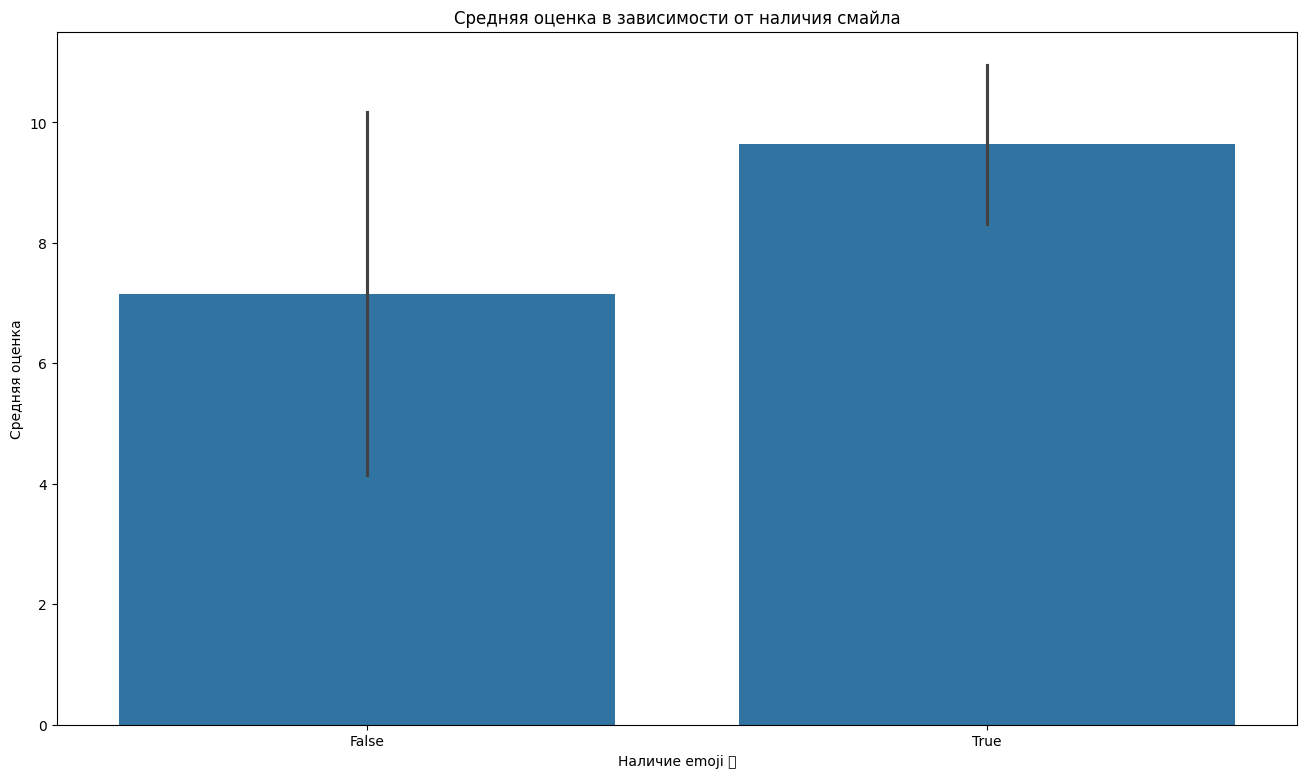

🔥: 381


<ipython-input-58-46a51eaca8ad>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



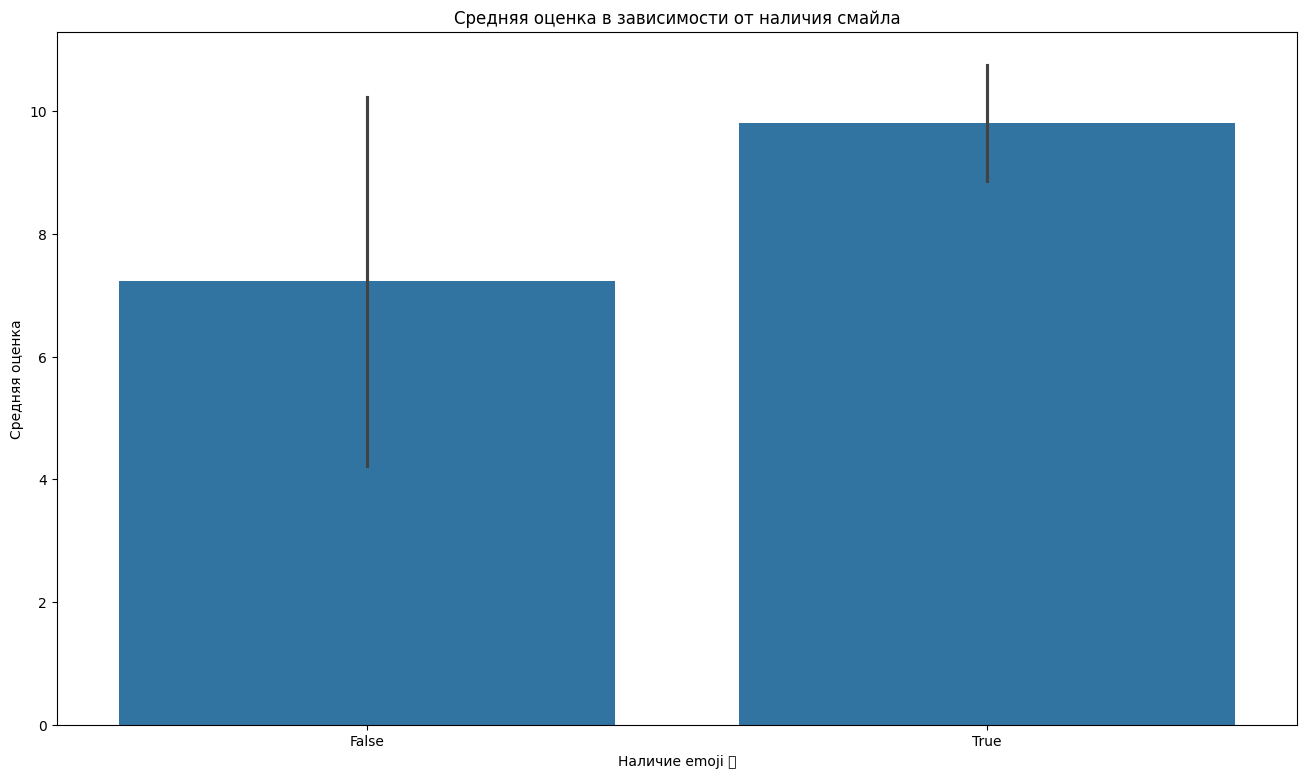

👍👍👍: 198


<ipython-input-58-46a51eaca8ad>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.



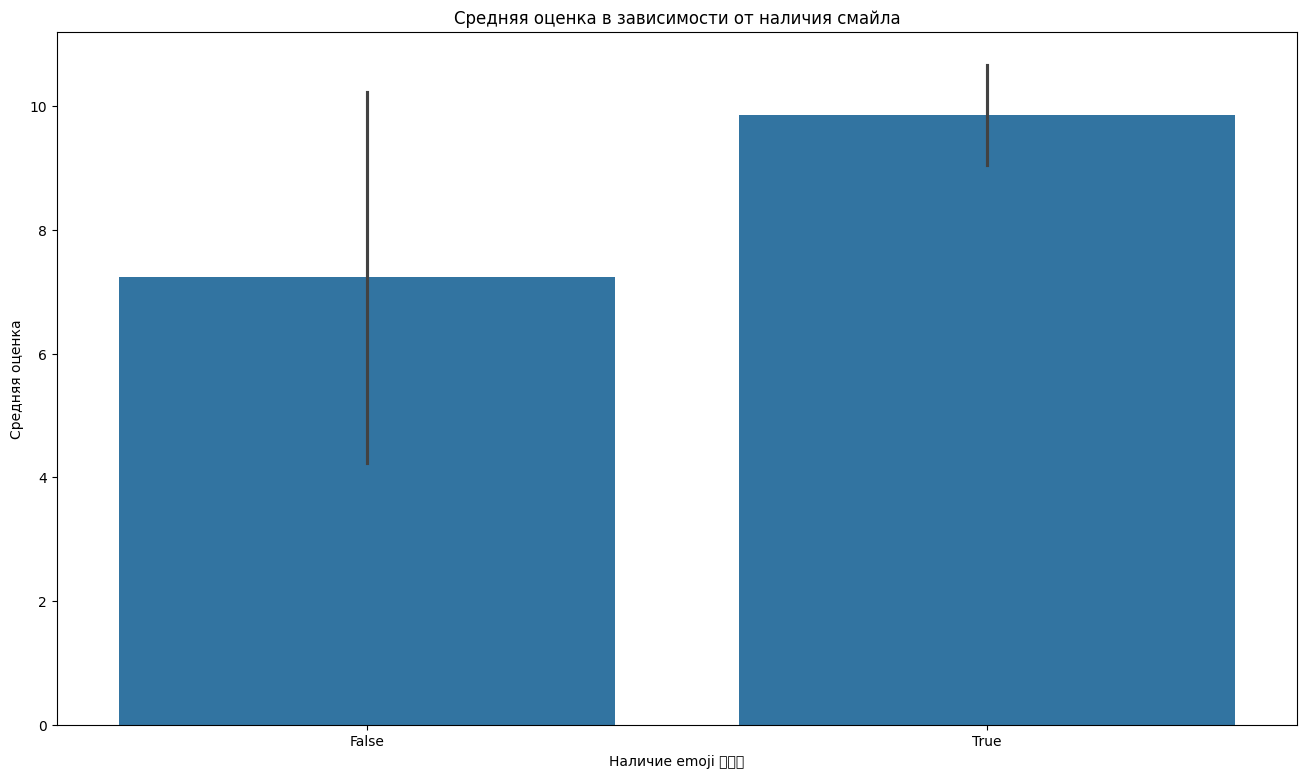

👌: 192


<ipython-input-58-46a51eaca8ad>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128076 (\N{OK HAND SIGN}) missing from font(s) DejaVu Sans.



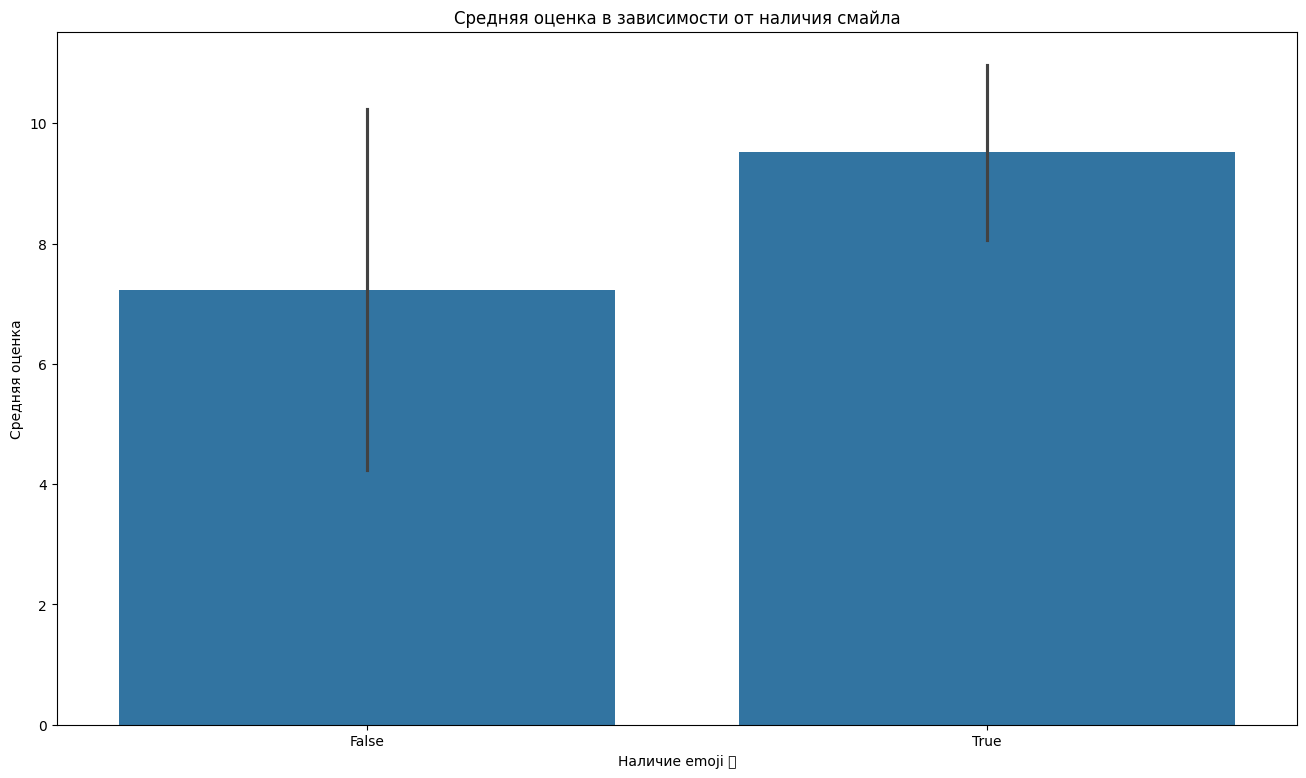

♀️: 181


<ipython-input-58-46a51eaca8ad>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




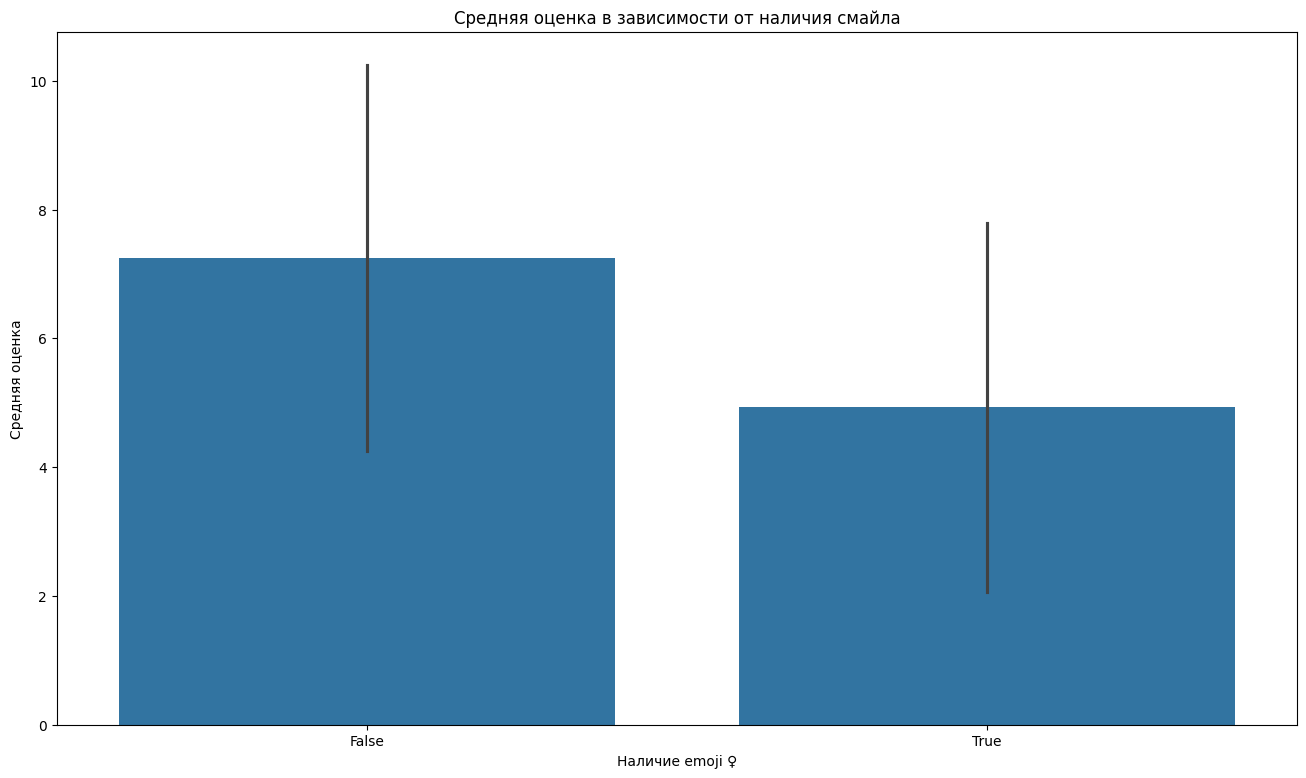

😍: 173


<ipython-input-58-46a51eaca8ad>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




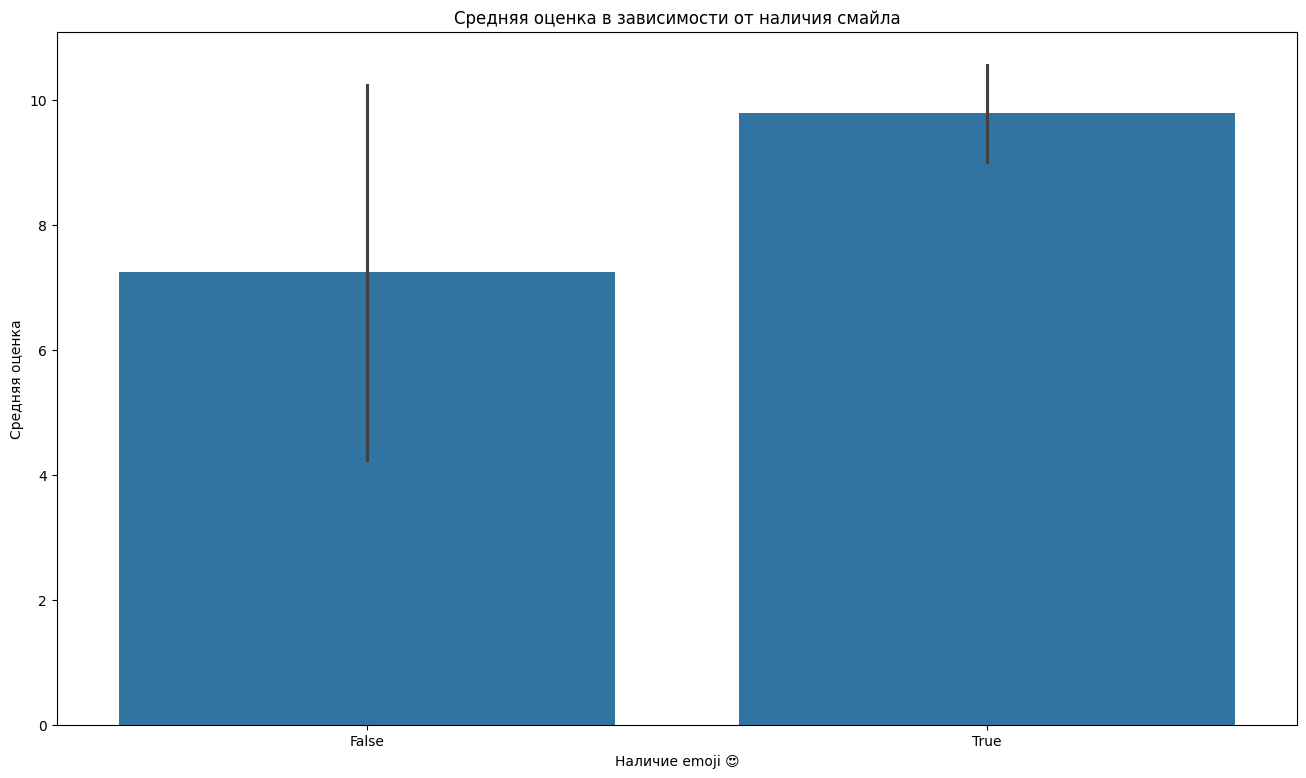

👍🏻: 169


<ipython-input-58-46a51eaca8ad>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.



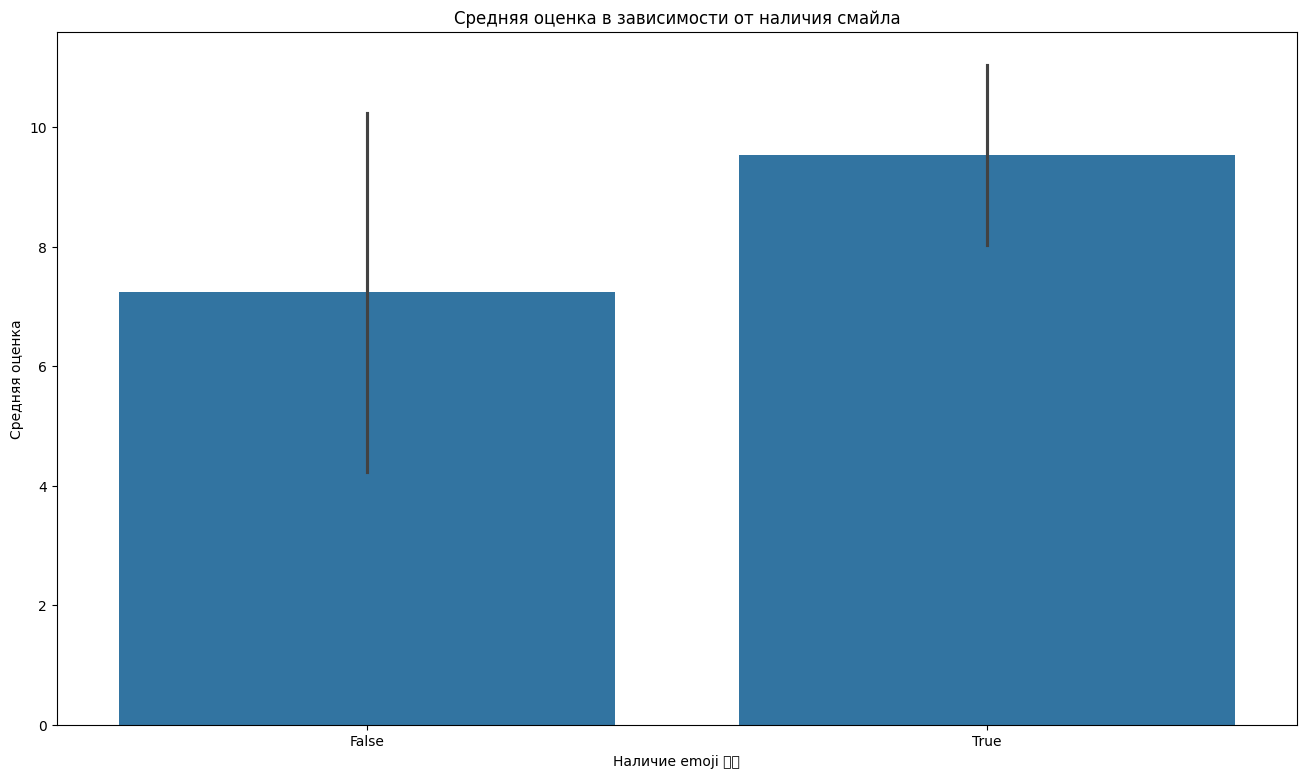

❤️: 147


<ipython-input-58-46a51eaca8ad>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




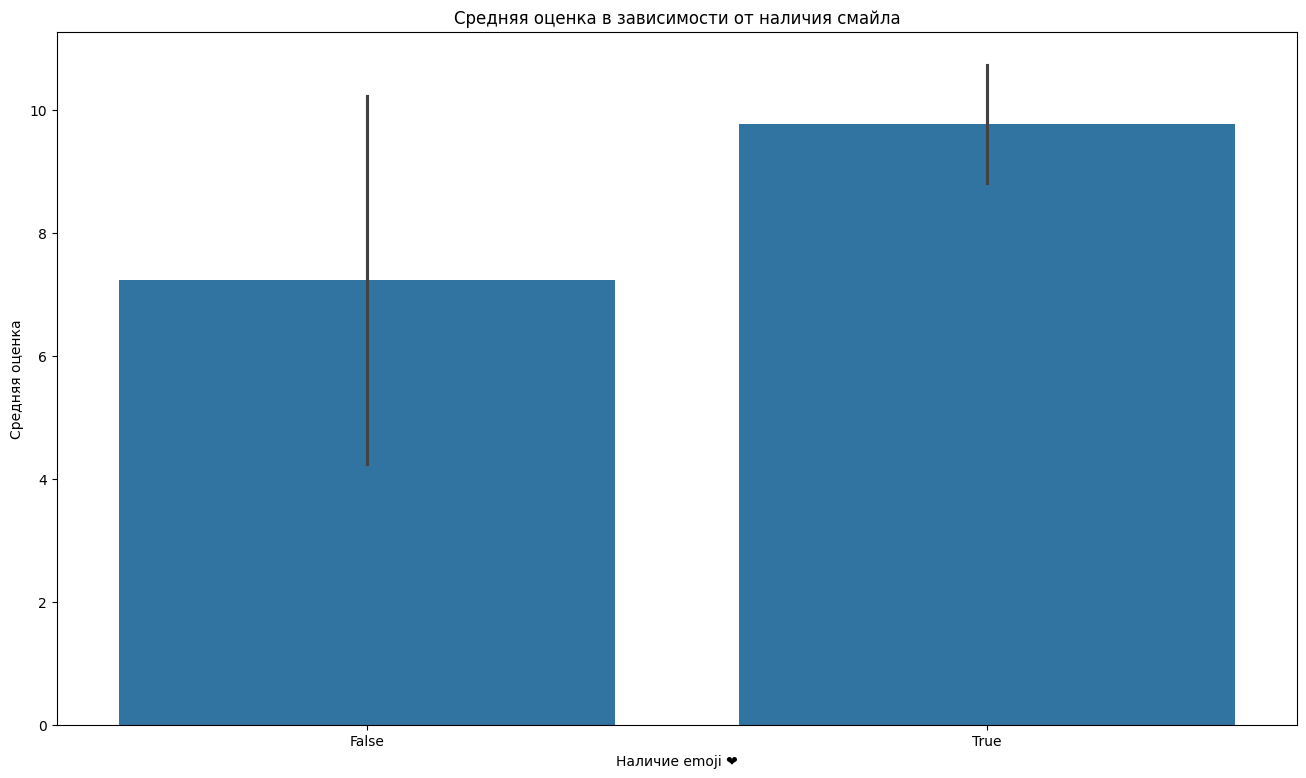

👎: 139


<ipython-input-58-46a51eaca8ad>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from font(s) DejaVu Sans.



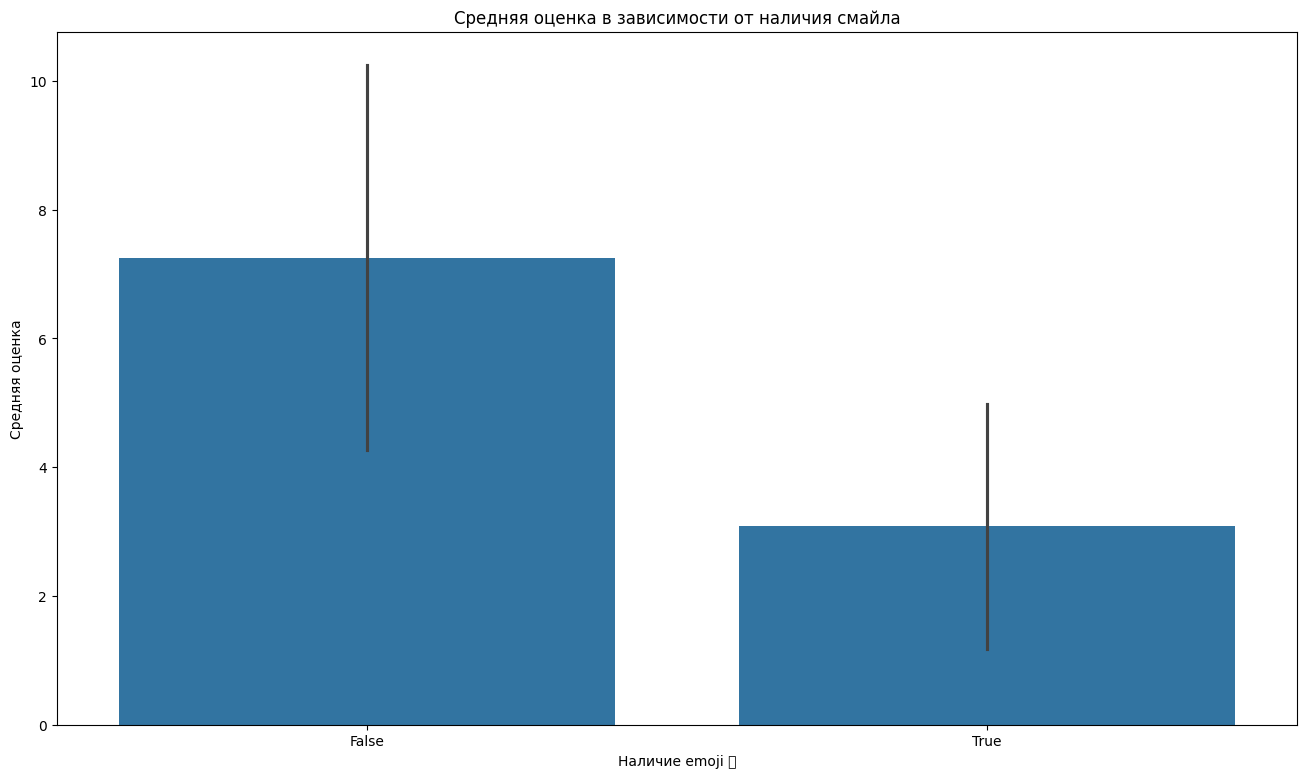

😁: 108


<ipython-input-58-46a51eaca8ad>:75: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




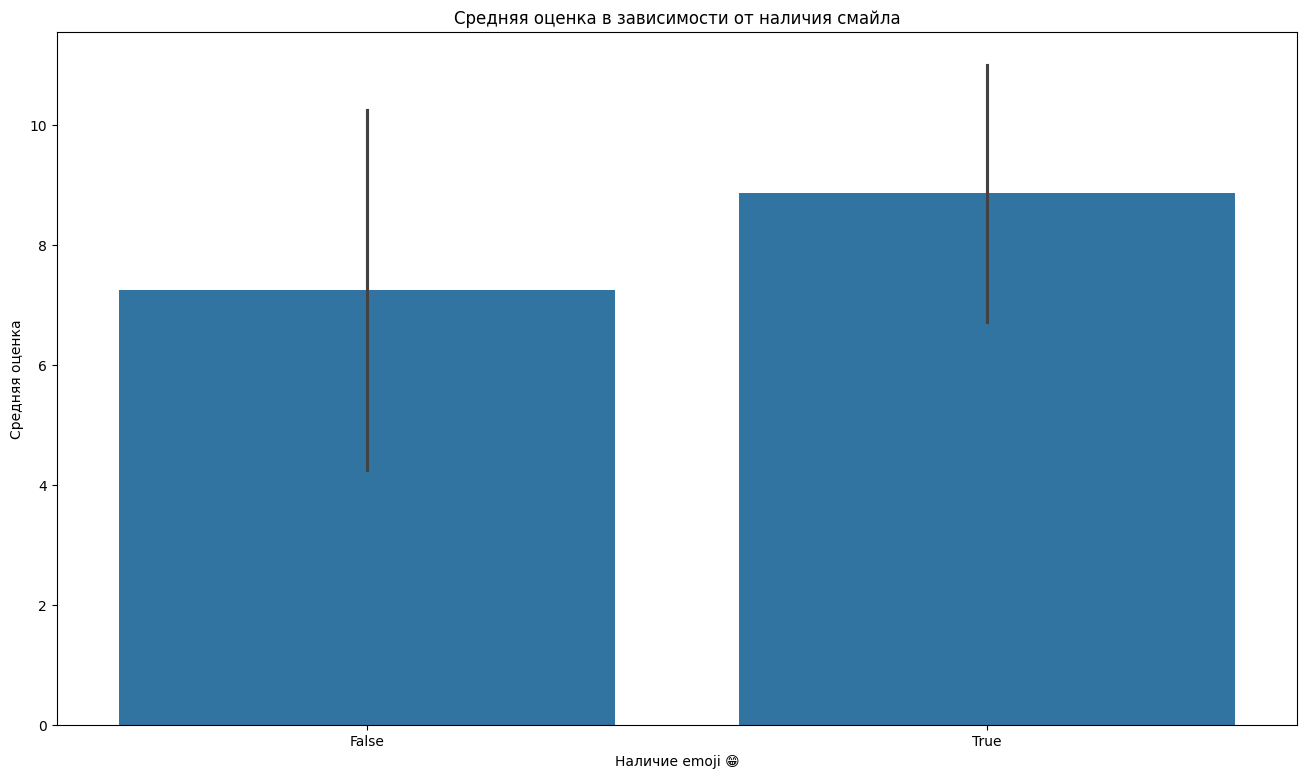


Корреляция между количеством смайликов и оценкой: 0.119


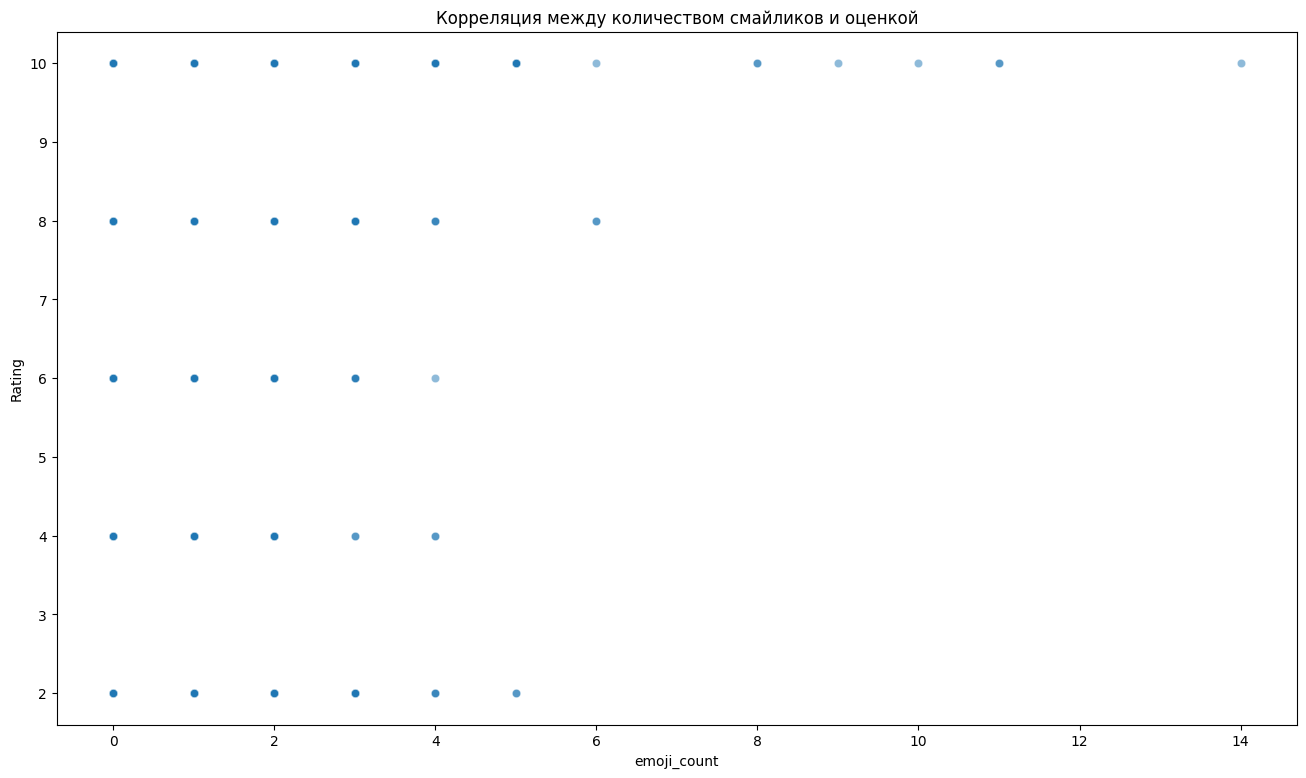

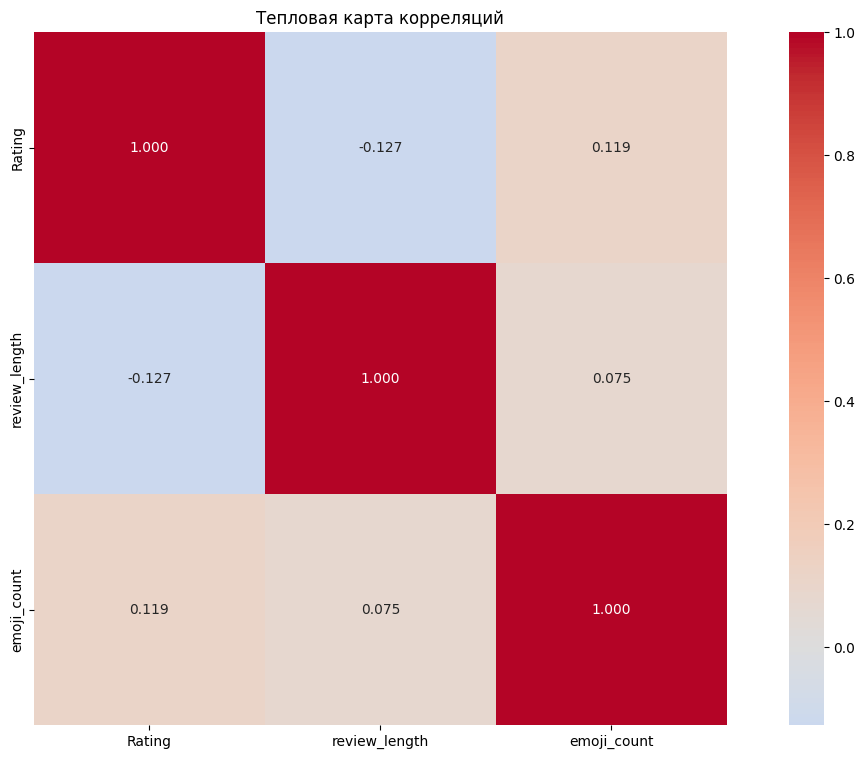

In [58]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='review_length', bins=50)
plt.title('Распределение длины отзывов')
plt.xlabel('Длина отзыва')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['review_length'])
plt.title('Box plot длины отзывов')
plt.ylabel('Длина отзыва')

plt.tight_layout()
plt.show()

Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

outliers_mask = df['review_length'] > outlier_threshold

correlation = df['review_length'].corr(df['Rating'])
print(f"\nКорреляция между длиной отзыва и оценкой: {correlation:.3f}")

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='review_length', y='Rating', alpha=0.5)
plt.title('Корреляция между длиной отзыва и оценкой')
plt.show()

print("\nАнализ выбросов:")
print(f"Количество выбросов: {outliers_mask.sum()}")
print(f"Процент выбросов: {(outliers_mask.sum() / len(df)) * 100:.2f}%")

print(f"\nСредняя оценка для обычных отзывов: {df[~outliers_mask]['Rating'].mean():.2f}")
print(f"Средняя оценка для очень длинных отзывов: {df[outliers_mask]['Rating'].mean():.2f}")

plt.figure(figsize=(16, 9))
sns.histplot(data=df[outliers_mask], x='Rating', label='Длинные отзывы', alpha=0.5)
sns.histplot(data=df[~outliers_mask], x='Rating', label='Обычные отзывы', alpha=0.5)
plt.title('Распределение оценок для обычных и длинных отзывов')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend()
plt.show()

from collections import Counter
import re

def extract_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.findall(text)

all_emojis = []
for review in df['Review']:
    if isinstance(review, str):
        all_emojis.extend(extract_emojis(review))

emoji_counts = Counter(all_emojis)

print("\nТоп-10 самых частых смайликов:")
for emoji, count in emoji_counts.most_common(10):
    print(f"{emoji}: {count}")
    edf = df
    edf["has_emoji"] = edf["Review"].apply(lambda x: x != None and emoji in str(x))
    fig = plt.figure(figsize=(16, 9))
    sns.barplot(x='has_emoji', y='Rating', data=df, ci="sd")
    plt.xlabel(f"Наличие emoji {emoji}")
    plt.ylabel("Средняя оценка")
    plt.title("Средняя оценка в зависимости от наличия смайла")
    plt.show()

df['emoji_count'] = df['Review'].apply(lambda x: len(extract_emojis(str(x))) if isinstance(x, str) else 0)

emoji_correlation = df['emoji_count'].corr(df['Rating'])
print(f"\nКорреляция между количеством смайликов и оценкой: {emoji_correlation:.3f}")

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='emoji_count', y='Rating', alpha=0.5)
plt.title('Корреляция между количеством смайликов и оценкой')
plt.show()

plt.figure(figsize=(16, 9))
sns.heatmap(df[['Rating', 'review_length', 'emoji_count']].corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.3f',
            square=True)
plt.title('Тепловая карта корреляций')
plt.show()

Топ-20 самых частых слов во всем датасете:
         Слово  Частота
0           не    35888
1            и    19685
2            в    18380
3           на    18263
4        очень    12666
5           но     8901
6          что     7124
7          как     6923
8          все     6886
9            с     6098
10      хорошо     5352
11         нет     5254
12    качество     4909
13          по     4708
14         для     4672
15          за     4618
16           а     4425
17  рекомендую     3868
18       запах     3750
19     спасибо     3659

Топ-20 самых частых биграмм во всем датасете:
               Биграмма  Частота
0         (на, подарок)     1486
1               (и, не)     1196
2           (не, очень)     1076
3          (в, подарок)     1027
4          (к, покупке)      751
5         (первый, раз)      692
6      (не, рекомендую)      692
7            (на, фото)      688
8            (так, как)      685
9   (качество, хорошее)      677
10            (у, меня)      675
11        

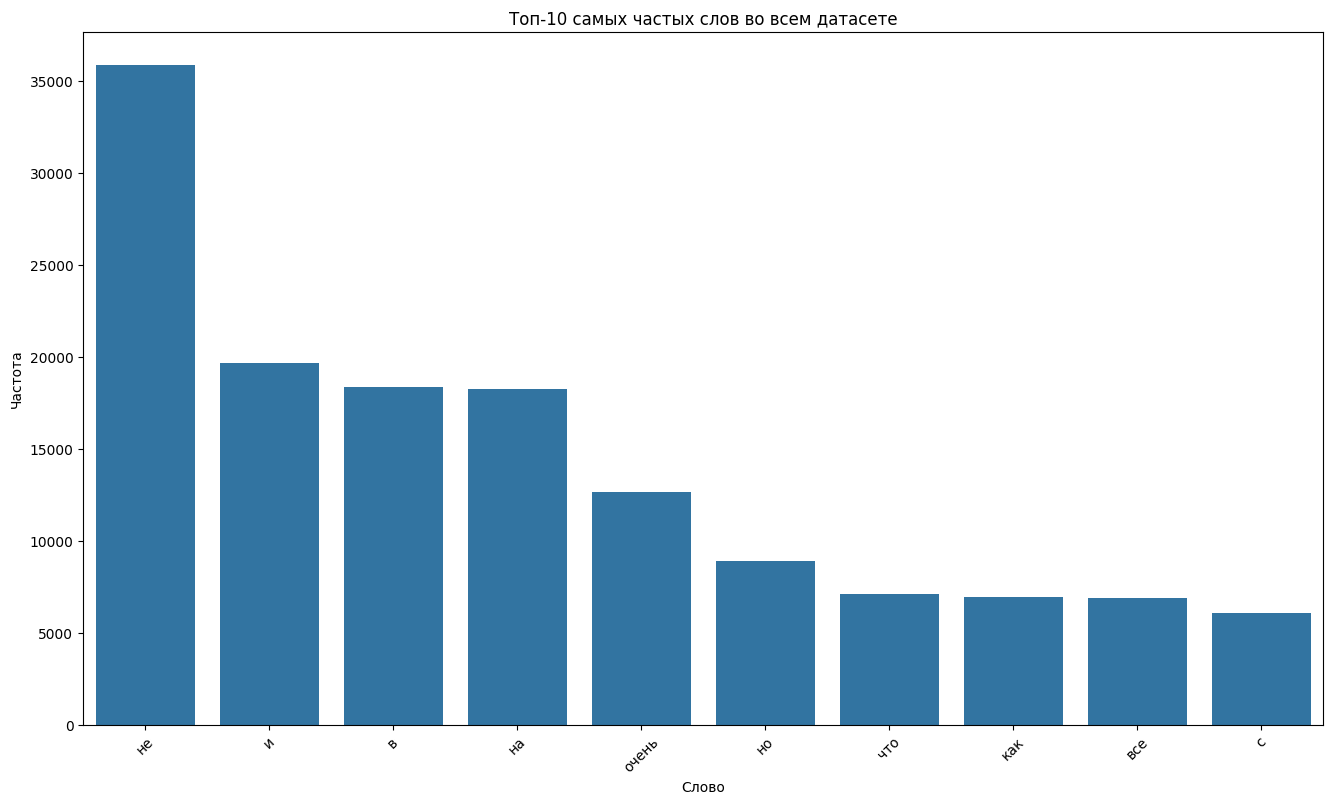

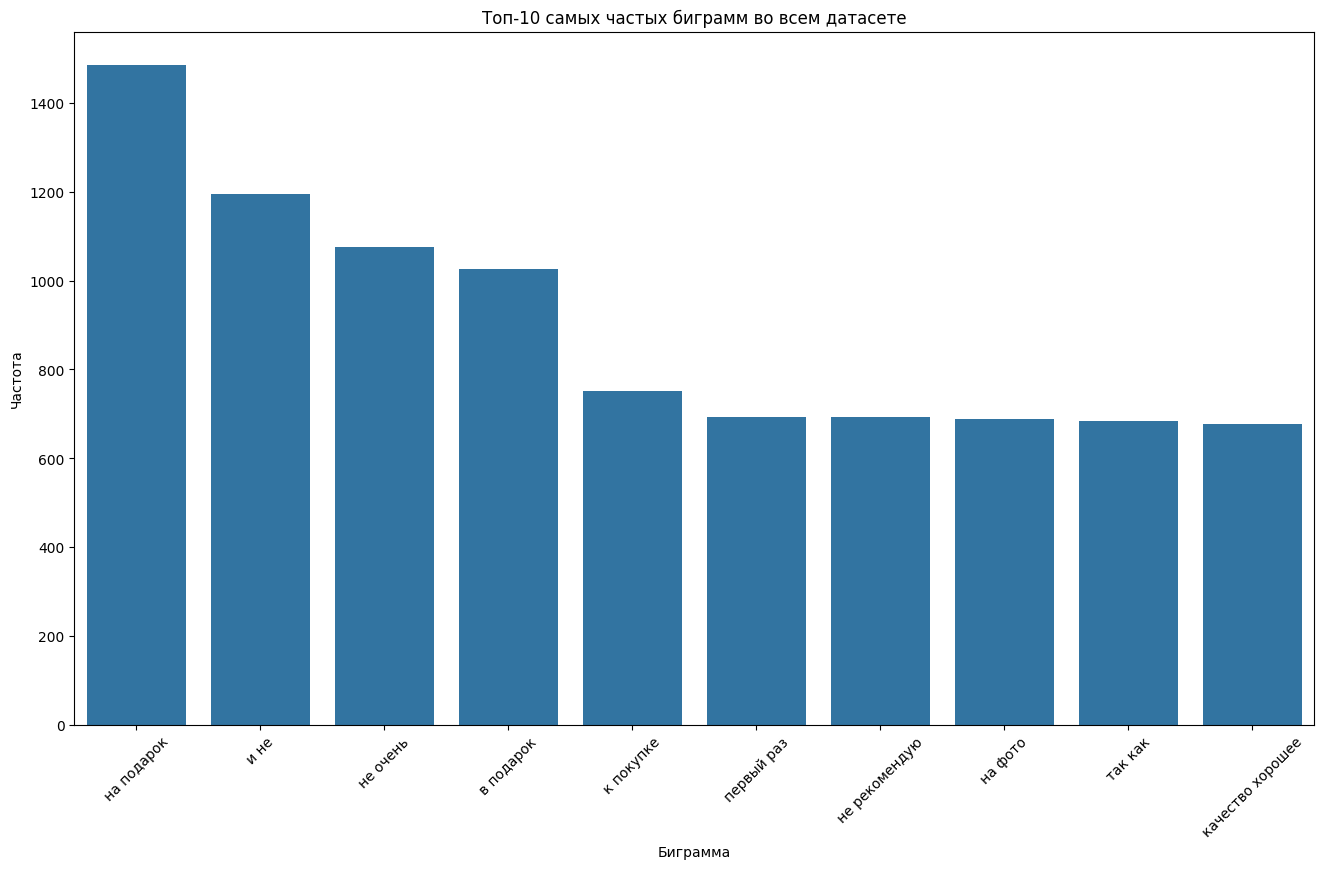

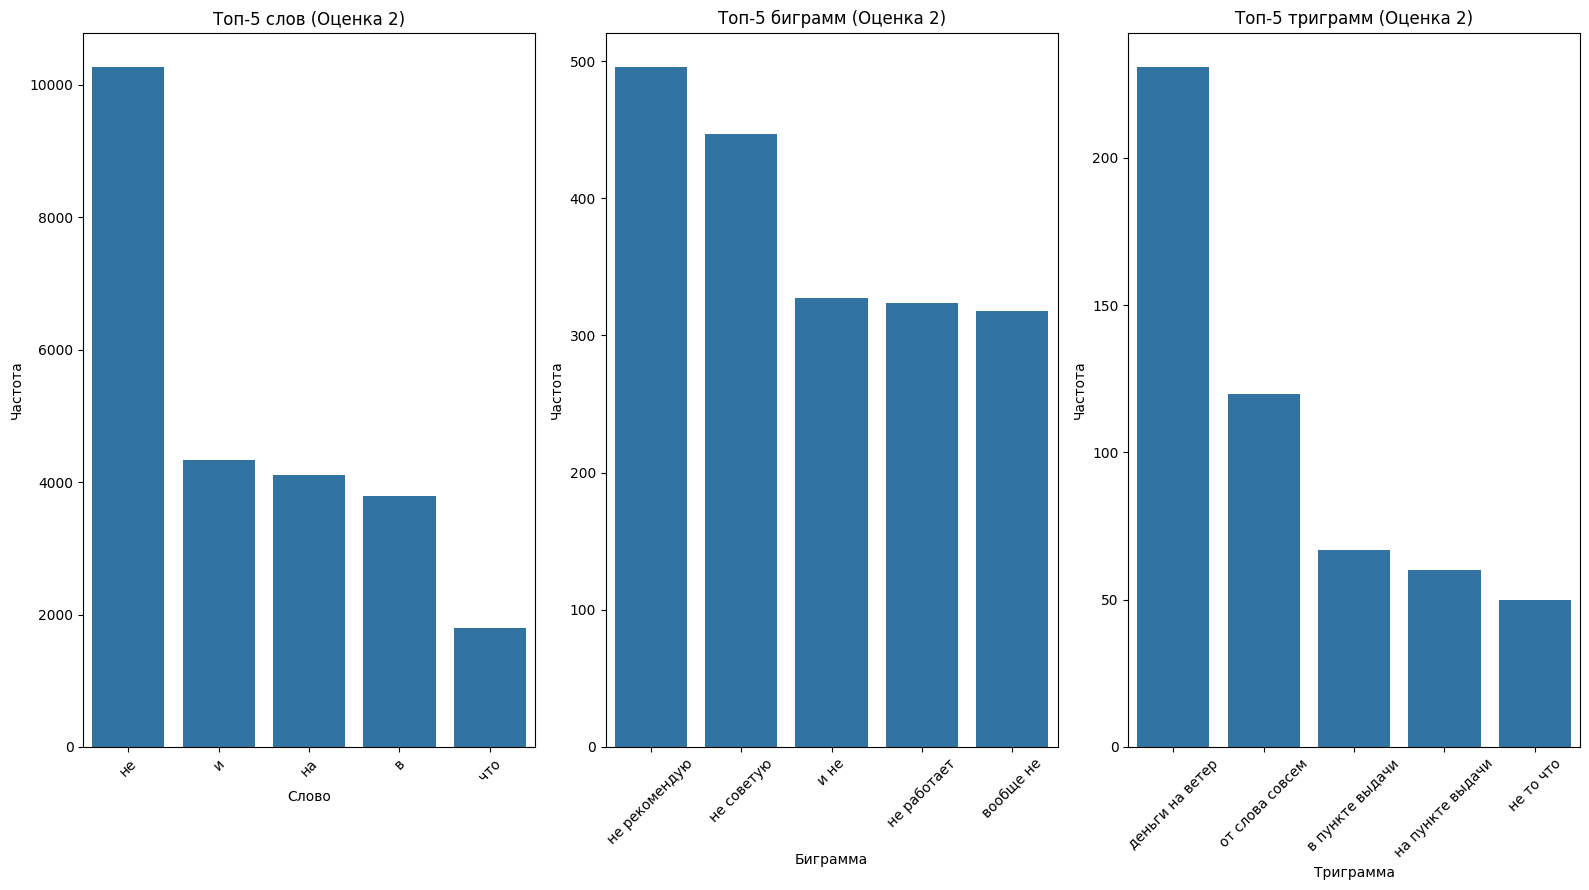

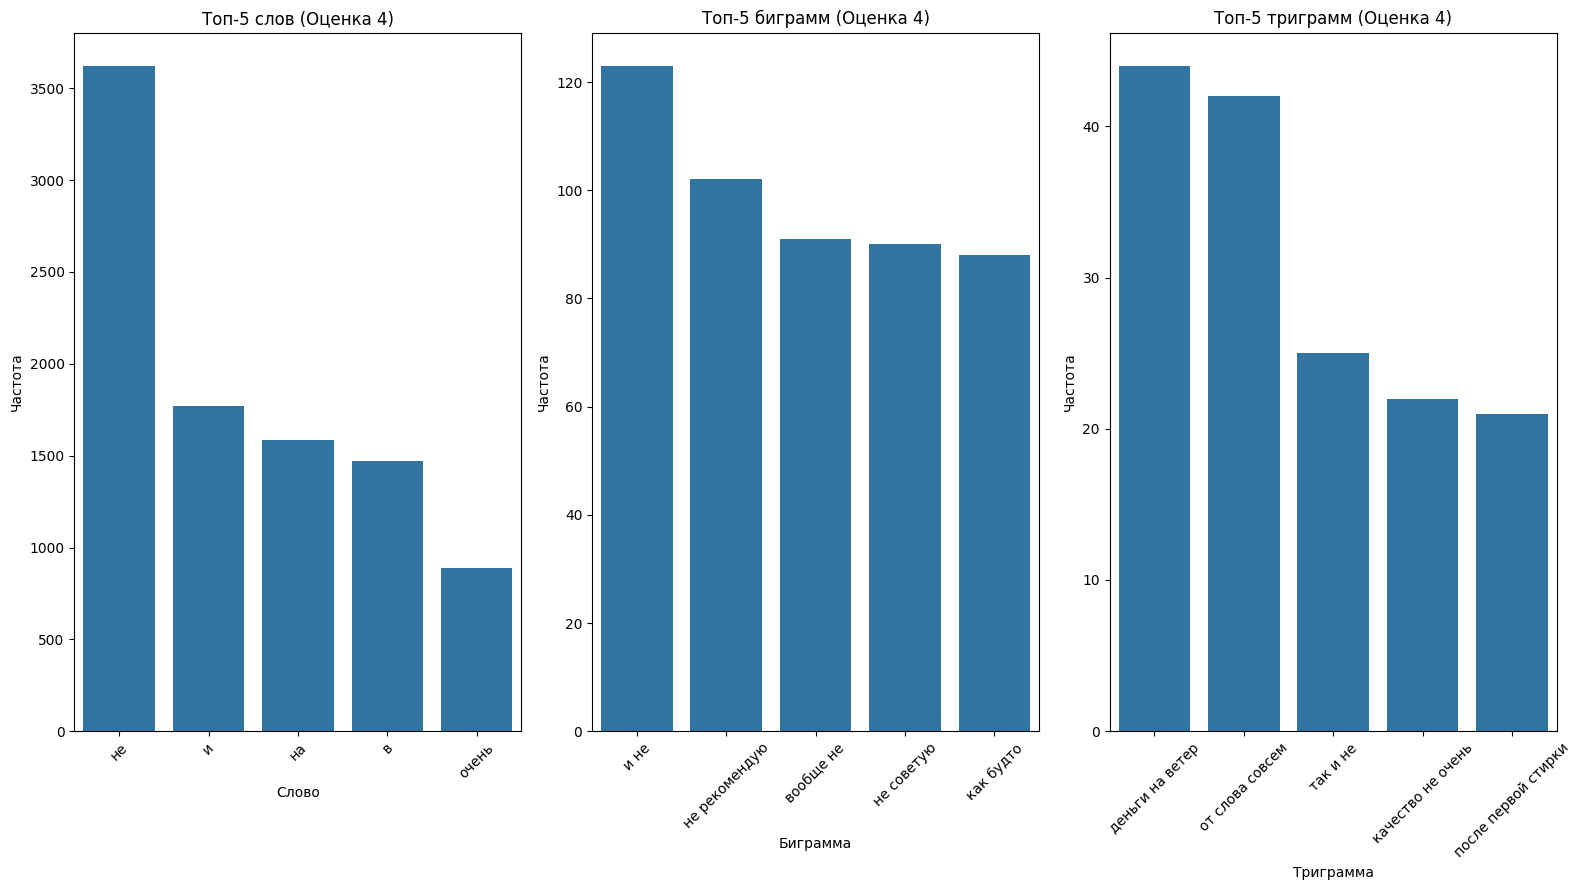

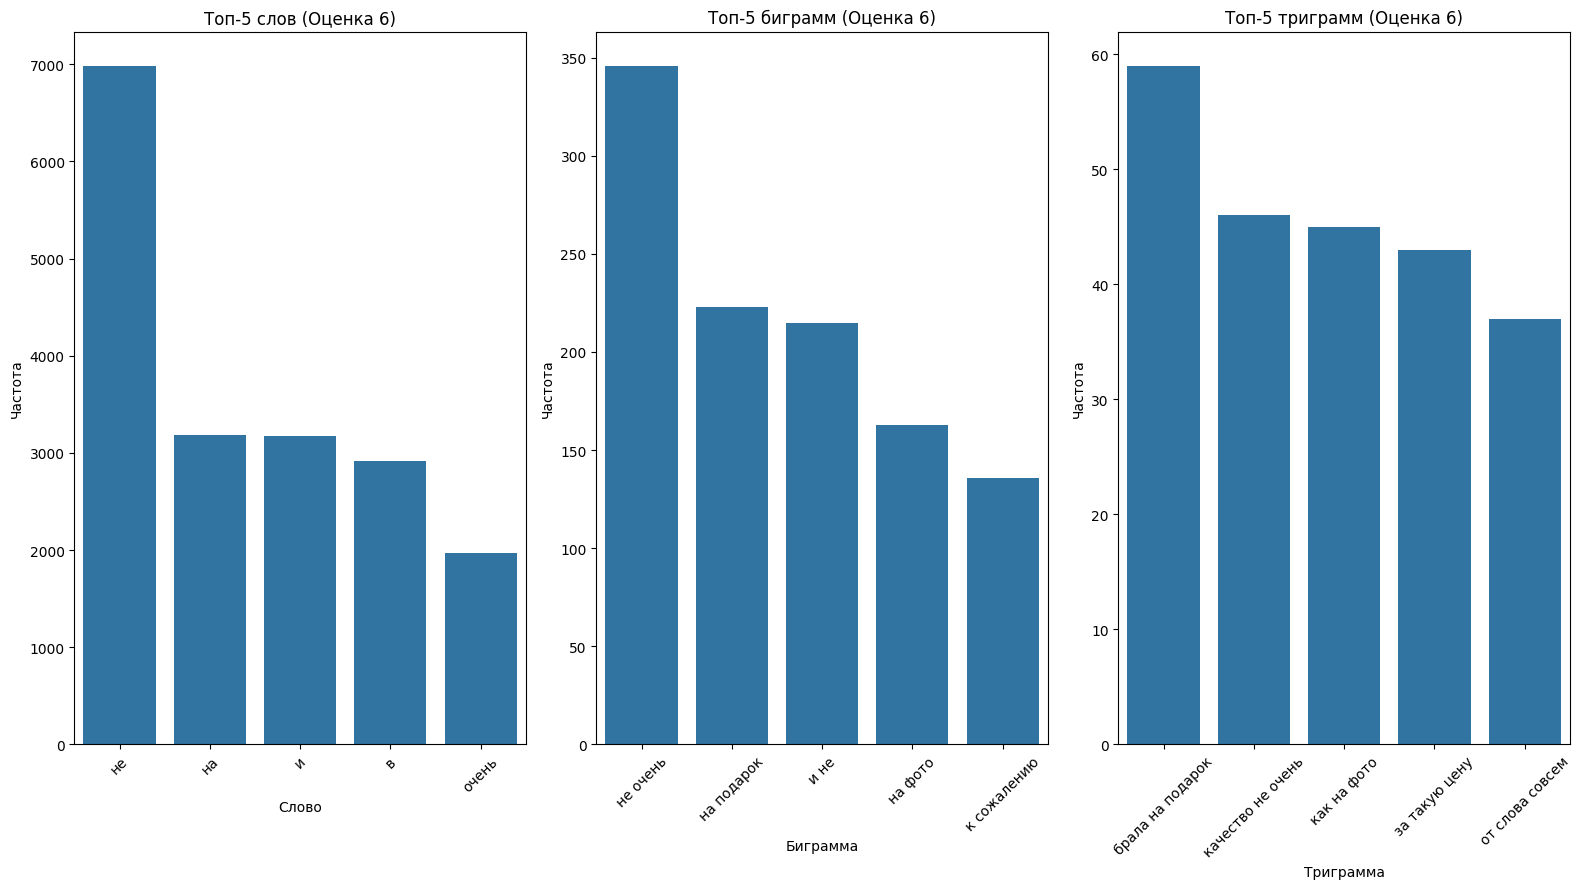

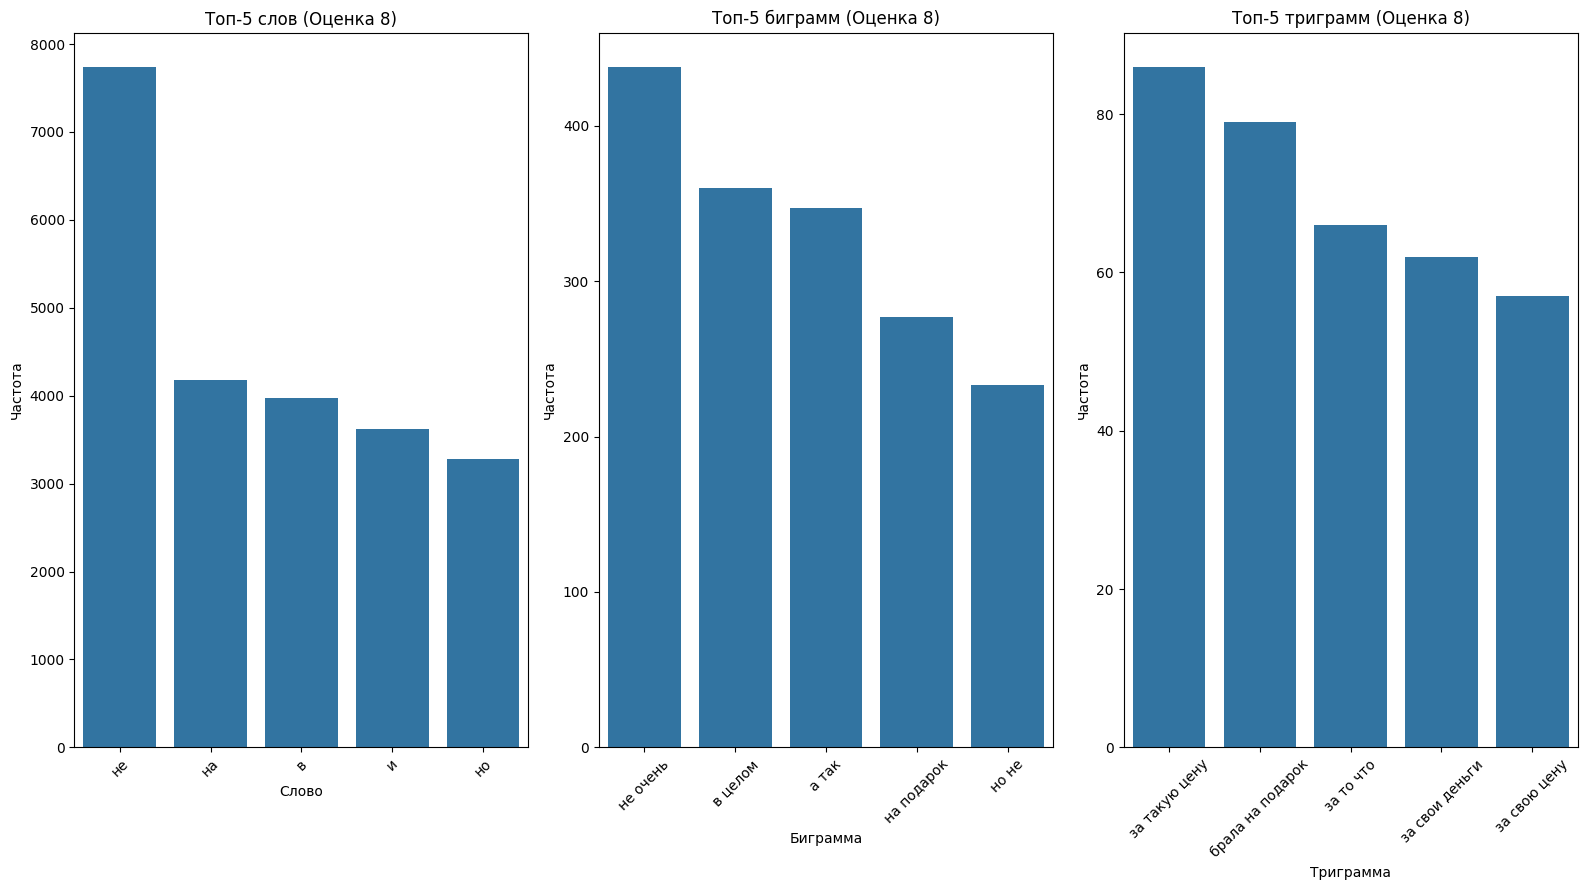

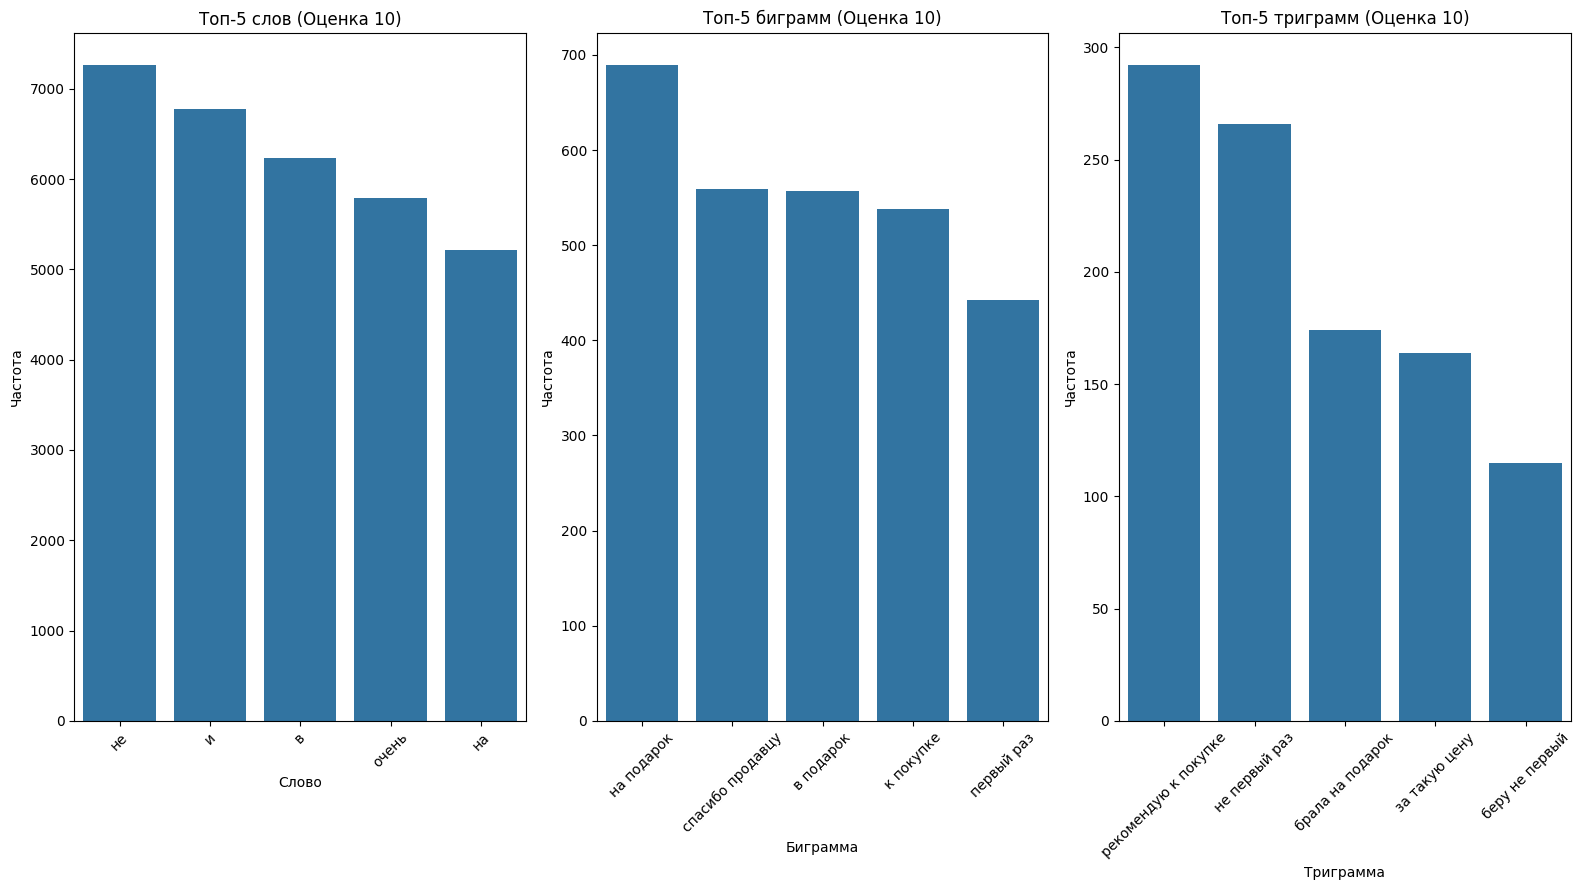

In [59]:
from collections import Counter
from nltk.util import ngrams
import re

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

all_words = []
all_bigrams = []
all_trigrams = []

words_by_rating = {i: [] for i in range(1, 11)}
bigrams_by_rating = {i: [] for i in range(1, 11)}
trigrams_by_rating = {i: [] for i in range(1, 11)}

for review, rating in zip(df['Review'], df['Rating']):
    text = preprocess_text(review)
    words = text.split()
    if len(words) < 1:
      continue

    all_words.extend(words)
    all_bigrams.extend(list(ngrams(words, 2)))
    all_trigrams.extend(list(ngrams(words, 3)))

    words_by_rating[rating].extend(words)
    bigrams_by_rating[rating].extend(list(ngrams(words, 2)))
    trigrams_by_rating[rating].extend(list(ngrams(words, 3)))

print("Топ-20 самых частых слов во всем датасете:")
print(pd.DataFrame(Counter(all_words).most_common(20), columns=['Слово', 'Частота']))

print("\nТоп-20 самых частых биграмм во всем датасете:")
print(pd.DataFrame(Counter(all_bigrams).most_common(20), columns=['Биграмма', 'Частота']))

print("\nТоп-20 самых частых триграмм во всем датасете:")
print(pd.DataFrame(Counter(all_trigrams).most_common(20), columns=['Триграмма', 'Частота']))

for rating in range(1, 11):
    print(f"\n\nАнализ для оценки {rating}:")

    print(f"\nТоп-10 самых частых слов для оценки {rating}:")
    print(pd.DataFrame(Counter(words_by_rating[rating]).most_common(10),
                      columns=['Слово', 'Частота']))

    print(f"\nТоп-10 самых частых биграмм для оценки {rating}:")
    print(pd.DataFrame(Counter(bigrams_by_rating[rating]).most_common(10),
                      columns=['Биграмма', 'Частота']))

    print(f"\nТоп-10 самых частых триграмм для оценки {rating}:")
    print(pd.DataFrame(Counter(trigrams_by_rating[rating]).most_common(10),
                      columns=['Триграмма', 'Частота']))

top_words = pd.DataFrame(Counter(all_words).most_common(10), columns=['Слово', 'Частота'])
plt.figure(figsize=(16, 9))
sns.barplot(data=top_words, x='Слово', y='Частота')
plt.title('Топ-10 самых частых слов во всем датасете')
plt.xticks(rotation=45)
plt.show()

top_bigrams = pd.DataFrame(Counter(all_bigrams).most_common(10), columns=['Биграмма', 'Частота'])
top_bigrams['Биграмма'] = top_bigrams['Биграмма'].apply(lambda x: ' '.join(x))
plt.figure(figsize=(16, 9))
sns.barplot(data=top_bigrams, x='Биграмма', y='Частота')
plt.title('Топ-10 самых частых биграмм во всем датасете')
plt.xticks(rotation=45)
plt.show()

for rating in range(1, 11):
    if words_by_rating[rating]:
        plt.figure(figsize=(16, 9))

        plt.subplot(131)
        top_words = pd.DataFrame(Counter(words_by_rating[rating]).most_common(5),
                               columns=['Слово', 'Частота'])
        sns.barplot(data=top_words, x='Слово', y='Частота')
        plt.title(f'Топ-5 слов (Оценка {rating})')
        plt.xticks(rotation=45)

        plt.subplot(132)
        top_bigrams = pd.DataFrame(Counter(bigrams_by_rating[rating]).most_common(5),
                                 columns=['Биграмма', 'Частота'])
        top_bigrams['Биграмма'] = top_bigrams['Биграмма'].apply(lambda x: ' '.join(x))
        sns.barplot(data=top_bigrams, x='Биграмма', y='Частота')
        plt.title(f'Топ-5 биграмм (Оценка {rating})')
        plt.xticks(rotation=45)

        plt.subplot(133)
        top_trigrams = pd.DataFrame(Counter(trigrams_by_rating[rating]).most_common(5),
                                  columns=['Триграмма', 'Частота'])
        top_trigrams['Триграмма'] = top_trigrams['Триграмма'].apply(lambda x: ' '.join(x))
        sns.barplot(data=top_trigrams, x='Триграмма', y='Частота')
        plt.title(f'Топ-5 триграмм (Оценка {rating})')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()